# Uczenie maszynowe w analizie szeregów czasowych

In [1]:
import tensorflow as tf

# Wymuszenie użycia GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Ustawienie użycia tylko pierwszego GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("GPU jest używane:", gpus[0])
    except RuntimeError as e:
        print(e)

## Setup

In [2]:
import numpy as np # algebra
import pandas as pd # data processing, zarządzanie plikami, ramki danych


import matplotlib as mpl
import matplotlib.pyplot as plt   # wizualizacja danych
#import seaborn as sns             # wizualizacja danych
import matplotlib.dates as mdates # wizualizacja danych - dat
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# Wybór danych

Wybrane szeregi czasowe to dane pobierane miesięcznie od 2014.01.01 do 2024.01.01.


# Szereg stacjonarny
1-Month Real Interest Rate

https://fred.stlouisfed.org/series/REAINTRATREARAT1MO

In [3]:
data_rate = pd.read_csv("C:/Users/Aldona/Documents/GitHub/Machine-learning-in-time-series-analysis/data/interest_rate.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_rate = pd.DataFrame(data_rate)
df_rate.columns.values[0] = 'REAL_INTEREST_RATE'
df_rate.index.freq = 'MS' # zaznaczam, że dane sa miesięczne (zazwyczaj powinno się i tak ustawić automatycznie)
#df_rate.loc['2022-06-01':, 'REAL_INTEREST_RATE'] = -6
print(df_rate.head(10))


            REAL_INTEREST_RATE
DATE                          
2014-01-01           -1.547831
2014-02-01           -1.563561
2014-03-01           -0.425359
2014-04-01           -1.576272
2014-05-01           -1.945522
2014-06-01           -1.248905
2014-07-01           -2.327665
2014-08-01           -1.696280
2014-09-01           -2.775060
2014-10-01           -1.153638


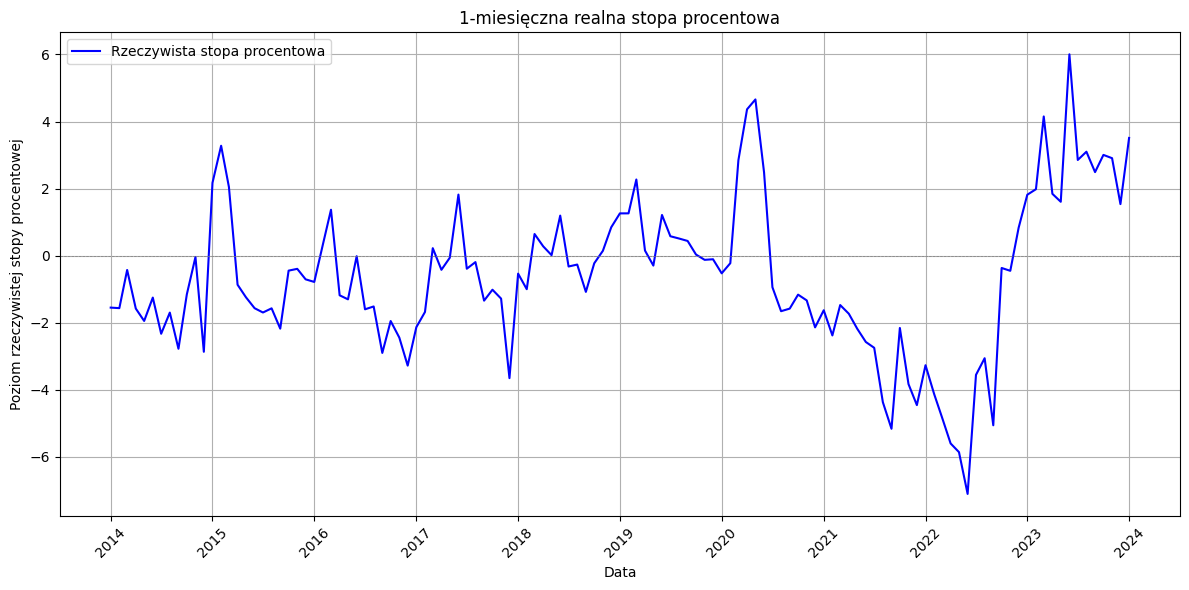

In [4]:
#df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_rate.index, df_rate['REAL_INTEREST_RATE'], label='Rzeczywista stopa procentowa', color='blue')
plt.title('1-miesięczna realna stopa procentowa')
plt.xlabel('Data')
plt.ylabel('Poziom rzeczywistej stopy procentowej')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.axhline(0, color='grey', lw=0.5, ls='--')  # Linia odniesienia na poziomie 0
plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()


# Szereg z trendem
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

https://fred.stlouisfed.org/series/CPIAUCSL

In [5]:
data_cpi = pd.read_csv("C:/Users/Aldona/Documents/GitHub/Machine-learning-in-time-series-analysis/data/cpi.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_cpi = pd.DataFrame(data_cpi)
df_cpi.columns.values[0] = 'CPI'
df_cpi.index.freq = 'MS' # zaznaczam, że dane sa miesięczne
print(df_cpi.head(10))

                CPI
DATE               
2014-01-01  235.288
2014-02-01  235.547
2014-03-01  236.028
2014-04-01  236.468
2014-05-01  236.918
2014-06-01  237.231
2014-07-01  237.498
2014-08-01  237.460
2014-09-01  237.477
2014-10-01  237.430


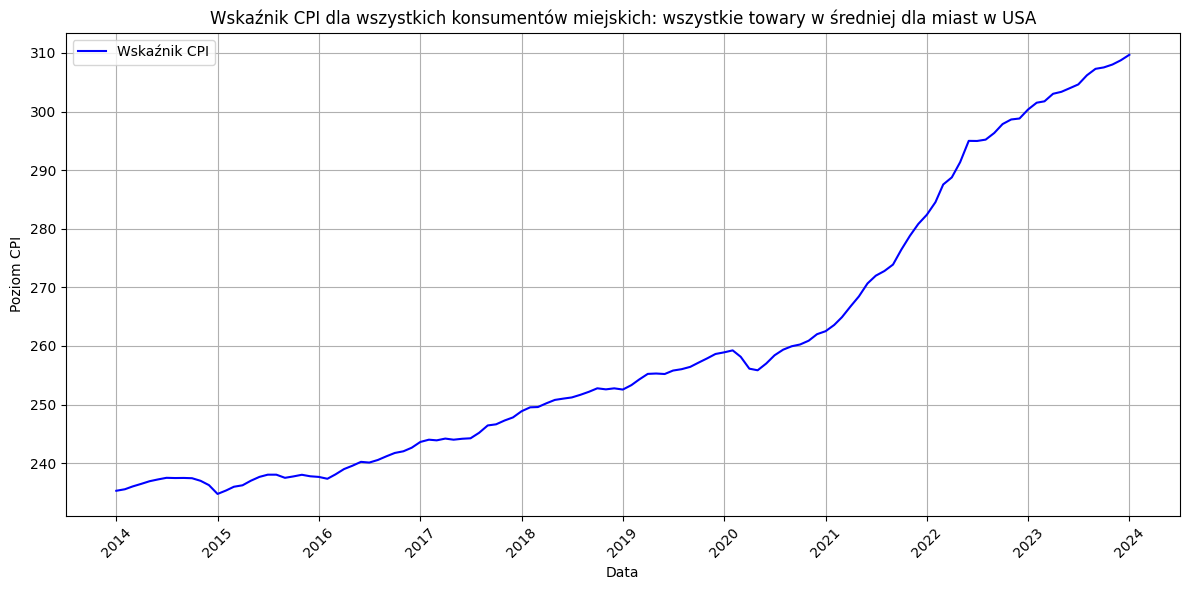

In [6]:
#df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_cpi.index, df_cpi['CPI'], label='Wskaźnik CPI', color='blue')
plt.title('Wskaźnik CPI dla wszystkich konsumentów miejskich: wszystkie towary w średniej dla miast w USA')
plt.xlabel('Data')
plt.ylabel('Poziom CPI')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()

# Szereg  z sezonowością
Retail Sales: Building Materials and Garden Equipment and Supplies Dealers

https://fred.stlouisfed.org/series/MRTSSM444USN

In [7]:
data_materials = pd.read_csv("C:/Users/Aldona/Documents/GitHub/Machine-learning-in-time-series-analysis/data/materials.csv", sep=',', encoding='utf-8', index_col = 'DATE', parse_dates = True) # upewnienie się, że daty będą rozpoznawane jako daty
df_materials = pd.DataFrame(data_materials)
df_materials.columns.values[0] = 'MAT' # kolumna jest interpretowana jako pierwsza kolumna w Data Frame
df_materials.index.freq = 'MS' # zaznaczam, że dane sa miesięczne
print(df_materials.head(10))

                MAT
DATE               
2014-01-01  19688.0
2014-02-01  18801.0
2014-03-01  24103.0
2014-04-01  30137.0
2014-05-01  33416.0
2014-06-01  30072.0
2014-07-01  28642.0
2014-08-01  26446.0
2014-09-01  26195.0
2014-10-01  27329.0


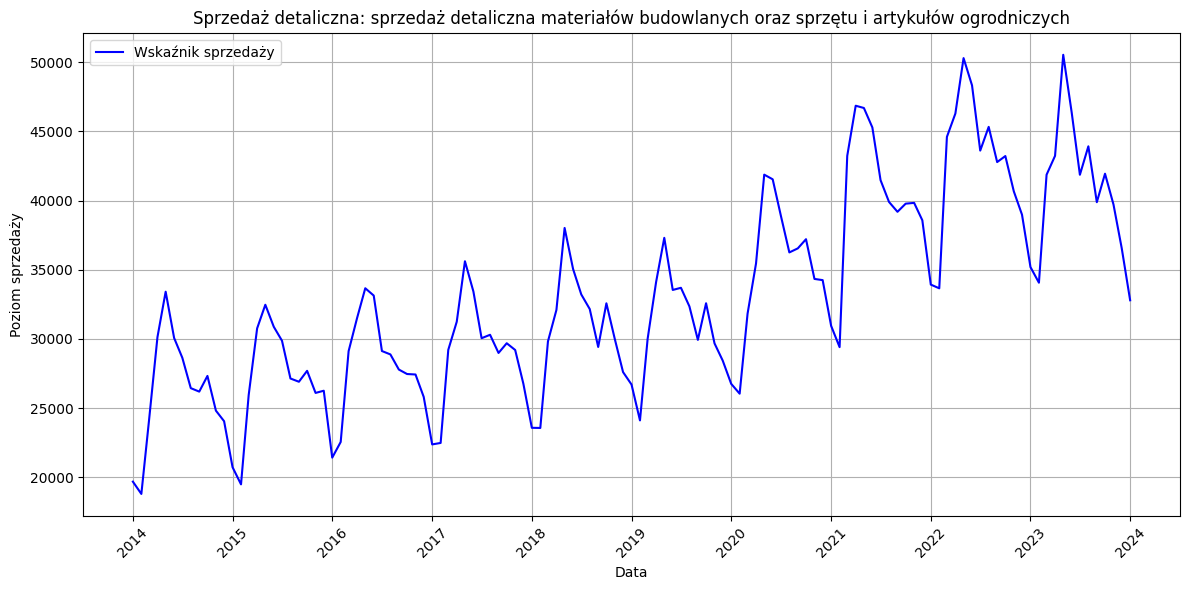

In [8]:
#df_materials['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_materials.index, df_materials['MAT'], label='Wskaźnik sprzedaży', color='blue')
plt.title('Sprzedaż detaliczna: sprzedaż detaliczna materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Data')
plt.ylabel('Poziom sprzedaży')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()

In [9]:
df_materials

,MAT
DATE,
2014-01-01,19688.0
2014-02-01,18801.0
2014-03-01,24103.0
2014-04-01,30137.0
2014-05-01,33416.0
...,...
2023-09-01,39883.0
2023-10-01,41941.0
2023-11-01,39719.0


# LSTM

Ładujemy bibliotekę do modelu LSTM

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

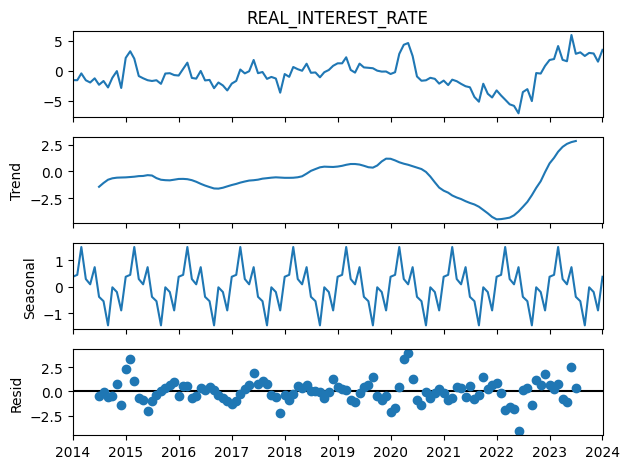

In [11]:
results = seasonal_decompose(df_rate['REAL_INTEREST_RATE'])
results.plot(); #; - wykresy nie pojawiają się podwójnie!

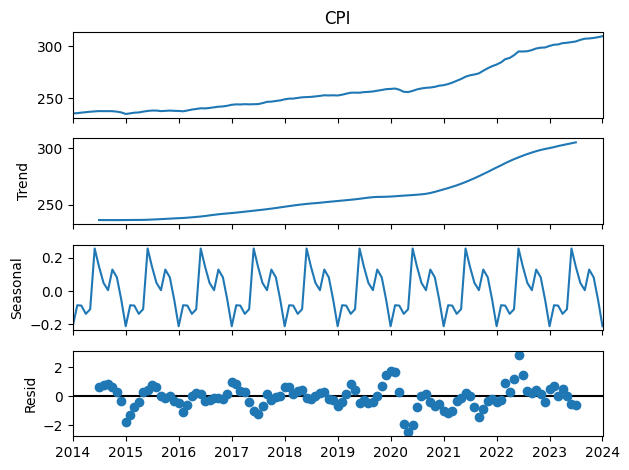

In [12]:
results = seasonal_decompose(df_cpi['CPI'])
results.plot(); #; - wykresy nie pojawiają się podwójnie!

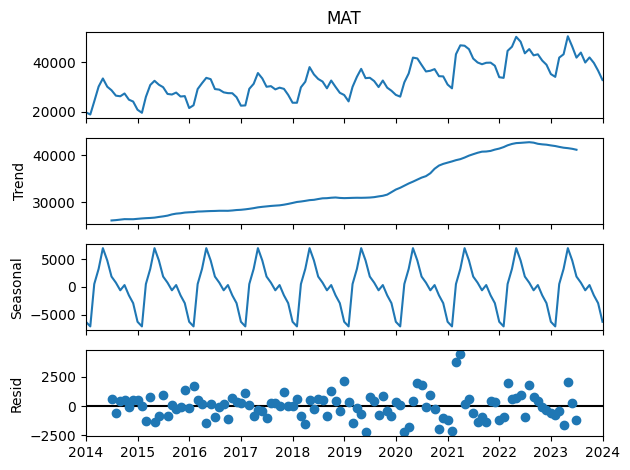

In [13]:
results = seasonal_decompose(df_materials['MAT'])
results.plot(); #; - wykresy nie pojawiają się podwójnie!

In [14]:
df_min_max = pd.DataFrame(data = [])

Dane do LSTM (ogólnie RNN) nie potrzebują badania stacjonarności szeregu, mogą one działać na danych niestacjonarnych. Do metod klasycznych o tym nie zapomnieć!!!!
PS. Jeśli model nie daje dobrych rezultatów, po (stacjonaryzacji/ustacjonorowaniu) danych może dać lepsze wyniki. Łatwiej wtedy modelowi nauczyć się paternu.
Sprawdzamy długośc szeregu i go dzielimy.

In [15]:
print(len(df_rate), len(df_rate)/4, len(df_rate)-24)

121 30.25 97


Zgadza się że pomiędzy 2014-01, a 2024-01 powinno być tyle miesięcy (10 lat plus miesiąc). Podzielimy dane na część testową i treningową. Do początku roku 2023 dane treningowe, pozostałe dane testowe.

In [16]:
train_rate = df_rate[:96]
test_rate = df_rate[96:]

train_cpi = df_cpi[:96]
test_cpi = df_cpi[96:]

train_mat = df_materials[:96]
test_mat = df_materials[96:]

Konwertujemy dane do skali (0, 1)

In [17]:
train_rate = df_rate[:96]
test_rate = df_rate[96:]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Przykład działania generatora itp

In [19]:
print(df_rate.head(), df_rate.tail())

            REAL_INTEREST_RATE
DATE                          
2014-01-01           -1.547831
2014-02-01           -1.563561
2014-03-01           -0.425359
2014-04-01           -1.576272
2014-05-01           -1.945522             REAL_INTEREST_RATE
DATE                          
2023-09-01            2.492336
2023-10-01            3.005341
2023-11-01            2.907568
2023-12-01            1.538694
2024-01-01            3.511612


In [20]:
scaler.fit(train_rate)
scaled_train_rate = scaler.transform(train_rate)
scaled_test_rate = scaler.transform(test_rate)

scaler.fit(train_cpi)
scaled_train_cpi = scaler.transform(train_cpi)
scaled_test_cpi = scaler.transform(test_cpi)

scaler.fit(train_mat)
scaled_train_mat = scaler.transform(train_mat)
scaled_test_mat = scaler.transform(test_mat)

In [21]:
df_scaled_train_rate = pd.DataFrame(scaled_train_rate)
df_scaled_train_cpi = pd.DataFrame(scaled_train_cpi)
df_scaled_train_mat = pd.DataFrame(scaled_train_mat)

In [22]:
df_scaled_test_rate= pd.DataFrame(scaled_test_rate)
df_scaled_test_cpi= pd.DataFrame(scaled_test_cpi)
df_scaled_test_mat= pd.DataFrame(scaled_test_mat)


In [23]:
df_scaled_test_rate

,0
0,0.192989
1,0.105310
2,0.035026
3,-0.044582
4,-0.070948
5,-0.197821
6,0.163639
7,0.214220
8,0.010585
9,0.488237


In [24]:
# Krok 1: Resetowanie indeksu w tabelach
df_rate_reset = df_rate.reset_index()
df_cpi_reset = df_cpi.reset_index()
df_mat_reset = df_materials.reset_index()

# Krok 2: Łączenie tabel wzdłuż kolumn
result = pd.concat([df_rate_reset, df_scaled_train_rate], axis=1)

# Krok 3: Opcjonalnie zmień nazwę kolumn
result.rename(columns={0: 'SCALED_RATE'}, inplace=True)

# Krok 4: Konwersja daty na format yyyy-mm-dd
result['DATE'] = pd.to_datetime(result['DATE']).dt.strftime('%Y-%m-%d')

# Krok 5: Zapisanie wyniku do pliku Excel
result.to_excel('wynik.xlsx', index=False)

# Wyświetlenie wyniku
print(result)


           DATE  REAL_INTEREST_RATE  SCALED_RATE
0    2014-01-01           -1.547831     0.367893
1    2014-02-01           -1.563561     0.366291
2    2014-03-01           -0.425359     0.482203
3    2014-04-01           -1.576272     0.364997
4    2014-05-01           -1.945522     0.327394
..          ...                 ...          ...
116  2023-09-01            2.492336          NaN
117  2023-10-01            3.005341          NaN
118  2023-11-01            2.907568          NaN
119  2023-12-01            1.538694          NaN
120  2024-01-01            3.511612          NaN

[121 rows x 3 columns]


In [25]:
# Krok 2: Łączenie tabel wzdłuż kolumn
result = pd.concat([df_cpi_reset, df_scaled_train_cpi], axis=1)

# Krok 3: Opcjonalnie zmień nazwę kolumn
result.rename(columns={0: 'SCALED_CPI'}, inplace=True)

# Krok 4: Konwersja daty na format yyyy-mm-dd
result['DATE'] = pd.to_datetime(result['DATE']).dt.strftime('%Y-%m-%d')

# Krok 5: Zapisanie wyniku do pliku Excel
result.to_excel('wynik.xlsx', index=False)

# Wyświetlenie wyniku
print(result)

           DATE      CPI  SCALED_CPI
0    2014-01-01  235.288    0.011745
1    2014-02-01  235.547    0.017368
2    2014-03-01  236.028    0.027811
3    2014-04-01  236.468    0.037363
4    2014-05-01  236.918    0.047133
..          ...      ...         ...
116  2023-09-01  307.288         NaN
117  2023-10-01  307.531         NaN
118  2023-11-01  308.024         NaN
119  2023-12-01  308.742         NaN
120  2024-01-01  309.685         NaN

[121 rows x 3 columns]


In [26]:
# Krok 2: Łączenie tabel wzdłuż kolumn
result = pd.concat([df_mat_reset, df_scaled_train_mat], axis=1)

# Krok 3: Opcjonalnie zmień nazwę kolumn
result.rename(columns={0: 'SCALED_MATERIALS'}, inplace=True)

# Krok 4: Konwersja daty na format yyyy-mm-dd
result['DATE'] = pd.to_datetime(result['DATE']).dt.strftime('%Y-%m-%d')

# Krok 5: Zapisanie wyniku do pliku Excel
result.to_excel('wynik.xlsx', index=False)

# Wyświetlenie wyniku
print(result)

           DATE      MAT  SCALED_MATERIALS
0    2014-01-01  19688.0          0.031619
1    2014-02-01  18801.0          0.000000
2    2014-03-01  24103.0          0.188999
3    2014-04-01  30137.0          0.404092
4    2014-05-01  33416.0          0.520978
..          ...      ...               ...
116  2023-09-01  39883.0               NaN
117  2023-10-01  41941.0               NaN
118  2023-11-01  39719.0               NaN
119  2023-12-01  36580.0               NaN
120  2024-01-01  32796.0               NaN

[121 rows x 3 columns]


Tworzymy generator. Ponieważ jest to uczenie nadzorowane, będziemy potrzebować generatora do prawidłowych predykcji. Przykład:
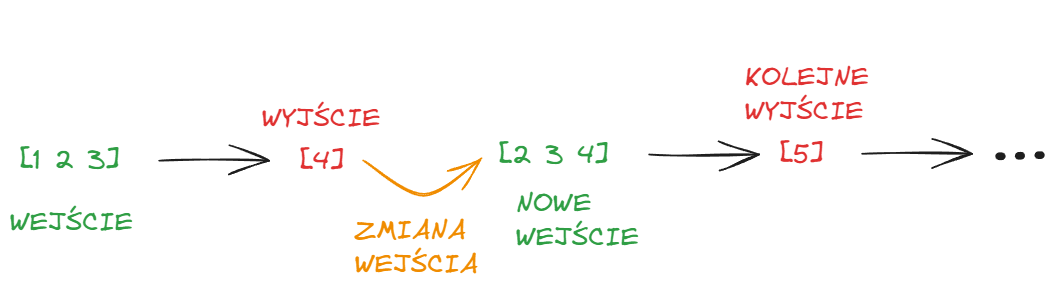

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator #w starszej wersji keras.preprocessing.sequence wystarczyło

In [28]:
# definuje generator - przykład
n_input = 3 #ilość wejść
n_features = 1 #ilość cech (można ustawić więcej dla szeregów, które miałyby więcej cech (kolumn))
generator = TimeseriesGenerator(scaled_train_rate, scaled_train_rate, length=n_input, batch_size=1)

In [29]:
#wygląd generatora
X, y = generator[0]
print(f'Wektor X (wektor danych wejściowych): \n{X}') #input #flatten() - przedstawia wektor poziomo
print(f'Wyjście y: \n{y}') #output

Wektor X (wektor danych wejściowych): 
[[[0.36789334]
  [0.36629144]
  [0.48220301]]]
Wyjście y: 
[[0.36499705]]


In [30]:
X.shape #(ilość kolumn, ilość wierszy, ilość cech) 

(1, 3, 1)

# Tworzenie modelu LSTM

In [31]:
# generator dla 12 miesięcy 
n_input = 12
generator = TimeseriesGenerator(scaled_train_rate, scaled_train_rate, length=n_input, batch_size=1)
#wygląd generatora
X, y = generator[0]
print(f'Wektor X (wektor danych wejściowych): \n{X}') #input #flatten() - przedstawia wektor poziomo
print(f'Wyjście y: \n{y}') #output


Wektor X (wektor danych wejściowych): 
[[[0.36789334]
  [0.36629144]
  [0.48220301]
  [0.36499705]
  [0.32739352]
  [0.39833529]
  [0.28847711]
  [0.3527757 ]
  [0.24291551]
  [0.40803698]
  [0.52150835]
  [0.23373715]]]
Wyjście y: 
[[0.74678252]]


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
# definiowanie modelu
model = Sequential() #wartstwy dodawane w sekwencji 
model.add(LSTM( 100, activation='tanh', input_shape=(n_input, n_features))) # dodajemy warstwe lstm do sieci, 100 neuronów, funkcja aktywacji - ReLu
model.add(Dense(1)) #Dodaje warstwę wyjściową (tylko jeden neuron)
model.compile(optimizer='adam', loss='mse') #konfiguracja modelu przed jego trenowaniem #Adam automatycznie dostosowuje współczynniki nauki (learning rate) dla każdej wagi osobno, na podstawie pierwszego rzędu momentu (średnia) oraz drugiego rzędu momentu (wariancja) gradientów.
# adam działa szybciej niż gradient prosty
model.summary() #budowa modelu


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

# Predykcja dla szeregu stacjonarnego - bez funkcji

In [34]:
# zostosuje model do danych (fit model)
model.fit(generator, epochs=75)

Epoch 1/75


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0741
Epoch 2/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388
Epoch 3/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321   
Epoch 4/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0332
Epoch 5/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243
Epoch 6/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245
Epoch 7/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272
Epoch 8/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189
Epoch 9/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178
Epoch 10/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183  
Epoch 11/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 
Epoch 12/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189
Epoch 13/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 14/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173
Epoch 15/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152  
Epoch 16/75
84/84 ━━━━

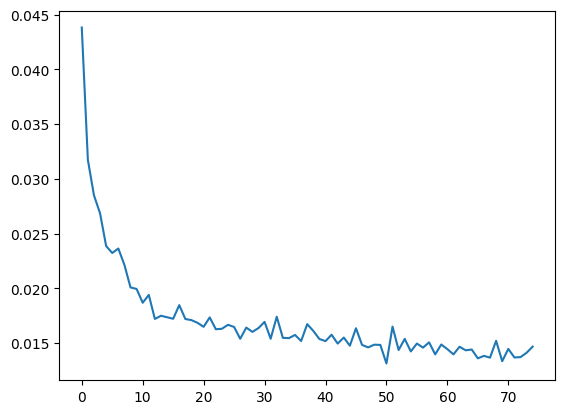

In [35]:
#funkcja straty - badanie efektywności modelu

loss_per_epochs = model.history.history['loss']
plt.plot(range(len(loss_per_epochs)), loss_per_epochs)

Zmiana wektora inputu o jeden miesiąc, było od 1-12 miesięcy, a nowy będzie od 2-13 miesięcy.

In [36]:
last_train_rate_batch = scaled_train_rate[-12:]

In [37]:
#tutaj następuje zmiana wektora o jeden
last_train_rate_batch = last_train_rate_batch.reshape((1, n_input, n_features))

In [38]:
#predykcja dla ostatniej wartości (np: 13-tego miesiąca)
model.predict(last_train_rate_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0.12931341]], dtype=float32)

In [39]:
scaled_test_rate[0]

array([0.1929886])

In [40]:
test_predictions = []
first_eval_batch = scaled_test_rate[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_rate)):
    current_pred = model.predict(current_batch)[0] # wartość przewidywana dla pierwszej serii
    test_predictions.append(current_pred) # dodaje wartość przewidywaną do serii
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1) #uaktualniam serie i usuwam pierwszą wartość

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [41]:
test_predictions

[array([0.78025126], dtype=float32),
 array([0.6785674], dtype=float32),
 array([0.6139028], dtype=float32),
 array([0.57339203], dtype=float32),
 array([0.55162036], dtype=float32),
 array([0.54678667], dtype=float32),
 array([0.55558735], dtype=float32),
 array([0.57415897], dtype=float32),
 array([0.5953462], dtype=float32),
 array([0.61090213], dtype=float32),
 array([0.61545366], dtype=float32),
 array([0.6067884], dtype=float32),
 array([0.59297824], dtype=float32),
 array([0.57963043], dtype=float32),
 array([0.5705036], dtype=float32),
 array([0.56743777], dtype=float32),
 array([0.5702077], dtype=float32),
 array([0.5771268], dtype=float32),
 array([0.585605], dtype=float32),
 array([0.5928022], dtype=float32),
 array([0.59653074], dtype=float32),
 array([0.59605247], dtype=float32),
 array([0.59227765], dtype=float32),
 array([0.58715874], dtype=float32),
 array([0.5826487], dtype=float32)]

In [42]:
test_rate.head()

,REAL_INTEREST_RATE
DATE,
2022-01-01,-3.265321
2022-02-01,-4.126292
2022-03-01,-4.816444
2022-04-01,-5.598164
2022-05-01,-5.857062


Skaluję dane treningowe spowrotem do skali żródłowej.

In [43]:
scaler.fit(train_rate)
true_predictions = scaler.inverse_transform(test_predictions)

In [44]:
true_predictions

array([[2.50134676],
       [1.50285486],
       [0.86787617],
       [0.47007773],
       [0.25628926],
       [0.20882442],
       [0.29524338],
       [0.47760868],
       [0.68565836],
       [0.83841081],
       [0.88310489],
       [0.79801571],
       [0.66240588],
       [0.53133615],
       [0.44171447],
       [0.41160939],
       [0.43880908],
       [0.50675154],
       [0.59000408],
       [0.66067751],
       [0.69728987],
       [0.69259349],
       [0.65552635],
       [0.60526088],
       [0.56097417]])

In [45]:
test_rate['PREDICTIONS'] = true_predictions

C:\Users\Aldona\AppData\Local\Temp\ipykernel_27240\4276456183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rate['PREDICTIONS'] = true_predictions


In [46]:
test_rate

,REAL_INTEREST_RATE,PREDICTIONS
DATE,,
2022-01-01,-3.265321,2.501347
2022-02-01,-4.126292,1.502855
2022-03-01,-4.816444,0.867876
2022-04-01,-5.598164,0.470078
2022-05-01,-5.857062,0.256289
2022-06-01,-7.102906,0.208824
2022-07-01,-3.553523,0.295243
2022-08-01,-3.056842,0.477609
2022-09-01,-5.056445,0.685658


<Axes: xlabel='DATE'>

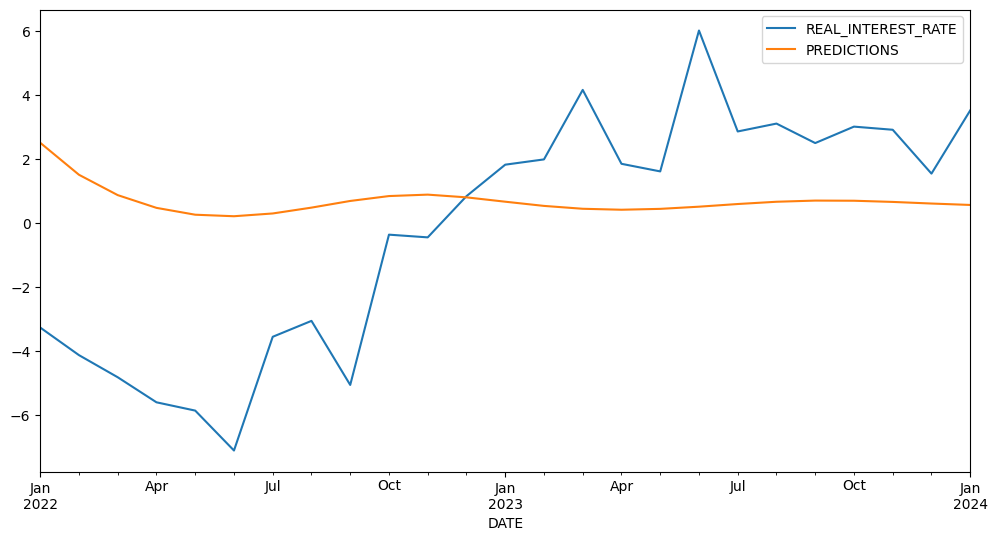

In [47]:
test_rate.plot(figsize=(12,6)) #sprawdzić, czy model przetrenowany, niedotrenowany, dopasować hiperparametry i sprawdzić dla pozostałych szeregów.

# Test RMSE

In [48]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(test_rate['REAL_INTEREST_RATE'], test_rate['PREDICTIONS'])
rmse

3.865596633335593

W porównaniu do skali danych błąd RMSE wyszedł bardzo duży. Zbadać powód dlaczego. Porównać z innymi szeregami. Ewentualnie dopytać na konsultacjach. Może sprowadzić dane do formy stacjonarnej???

# Funkcja tworzenia modelu LSTM

In [49]:
# n_features = 12
# definiowanie modelu
def modelLSTM(n_input, n_features):
    model = Sequential() #wartstwy dodawane w sekwencji 
    model.add(LSTM( 100, activation='tanh', input_shape=(n_input, n_features))) # zmieniam z relu na tanh # dodajemy warstwe lstm do sieci, 100 neuronów, funkcja aktywacji - ReLu
    model.add(Dense(1)) #Dodaje warstwę wyjściową (tylko jeden neuron)
    model.compile(optimizer='adam', loss='mse') #konfiguracja modelu przed jego trenowaniem #Adam automatycznie dostosowuje współczynniki nauki (learning rate) dla każdej wagi osobno, na podstawie pierwszego rzędu momentu (średnia) oraz drugiego rzędu momentu (wariancja) gradientów.
    # adam działa szybciej niż gradient prosty
    model.summary() #budowa modelu
    return model

model_rate = modelLSTM(n_input, n_features)
model_cpi = modelLSTM(n_input, n_features)
model_mat = modelLSTM(n_input, n_features)

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
train_rate.columns.tolist()
test_rate

,REAL_INTEREST_RATE,PREDICTIONS
DATE,,
2022-01-01,-3.265321,2.501347
2022-02-01,-4.126292,1.502855
2022-03-01,-4.816444,0.867876
2022-04-01,-5.598164,0.470078
2022-05-01,-5.857062,0.256289
2022-06-01,-7.102906,0.208824
2022-07-01,-3.553523,0.295243
2022-08-01,-3.056842,0.477609
2022-09-01,-5.056445,0.685658


# Funkcja generowania predykcji - predykcja szeregu stacjonarnego

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

def gen_pred(model, train_data, test_data, n_input, n_features, n_epochs):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # Skalowanie danych (zakładając, że skalujemy tylko kolumnę z rzeczywistymi wartościami)
    scaled_train_data = scaler.fit_transform(train_data.iloc[:, [0]])
    scaled_test_data = scaler.transform(test_data.iloc[:, [0]])

    # Generator dla 12 miesięcy
    generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

    # Trenowanie modelu i zbieranie historii
    history = model.fit(generator, epochs=n_epochs)  # liczba epok

    # Generowanie predykcji
    test_predictions = []
    first_eval_batch = scaled_test_data[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(scaled_test_data)):
        current_pred = model.predict(current_batch)[0]  # wartość przewidywana dla pierwszej serii
        test_predictions.append(current_pred)  # dodaje wartość przewidywaną do serii
        current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)  # aktualizacja serii
    
    # Odwrócenie skalowania predykcji
    true_predictions = scaler.inverse_transform(test_predictions)

    # Zwracanie predykcji i funkcji straty
    return true_predictions, history.history['loss']


# true_pred_rate = gen_pred(model_rate, train_rate, test_rate, n_input, n_features, 75)
# true_pred_rate = gen_pred(model_cpi, train_cpi, test_cpi, n_input, n_features, 75)
# true_pred_rate = gen_pred(model_mat, train_mat, test_mat, n_input, n_features, 75)




## Rate - po funkcji

In [52]:
model_rate = modelLSTM(n_input, n_features)

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
true_pred_rate, loss_rate = gen_pred(model_rate, train_rate, test_rate, n_input, n_features, 150)


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1094
Epoch 2/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1423
Epoch 3/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1288
Epoch 4/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0778
Epoch 5/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0660
Epoch 6/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562
Epoch 7/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0594
Epoch 8/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0697
Epoch 9/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0566
Epoch 10/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0547
Epoch 11/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0495
Epoch 12/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392
Epoch 13/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0469
Epoch 14/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0616
Epoch 15/150
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514
Epoc

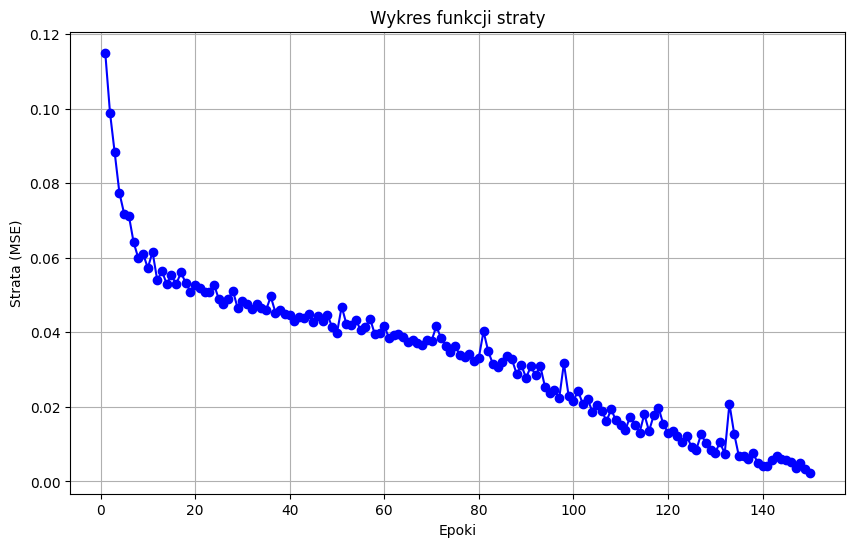

In [54]:
# Rysowanie wykresu
plt.figure(figsize=(10, 6))  # Rozmiar wykresu
plt.plot(range(1, len(loss_rate) + 1), loss_rate, marker='o', linestyle='-', color='b')
plt.title('Wykres funkcji straty')
plt.xlabel('Epoki')  # Oś X - liczba epok
plt.ylabel('Strata (MSE)')  # Oś Y - wartość funkcji straty
plt.grid(True)  # Dodanie siatki
plt.show()

In [55]:
test_rate['PREDICTIONS'] = true_pred_rate


C:\Users\Aldona\AppData\Local\Temp\ipykernel_27240\3406219996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rate['PREDICTIONS'] = true_pred_rate


<Axes: xlabel='DATE'>

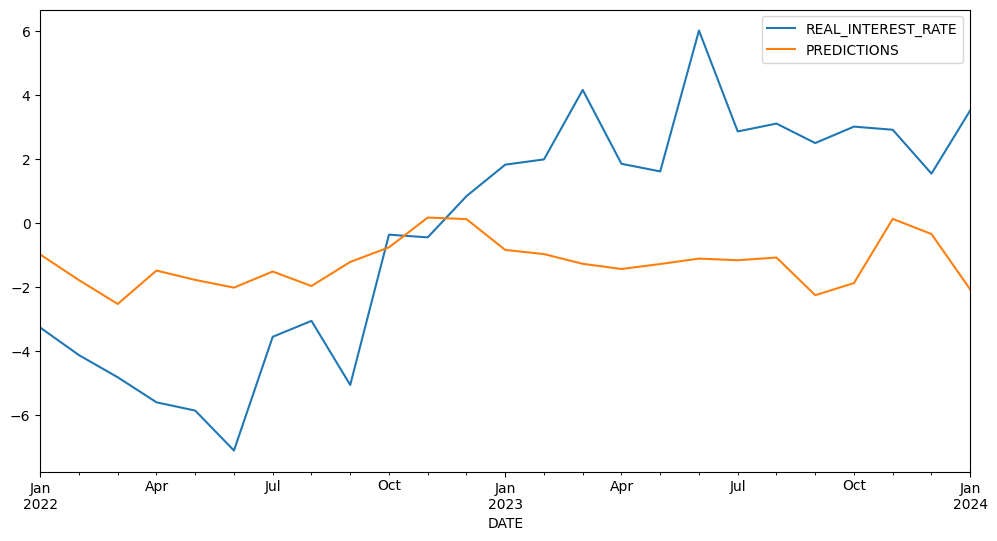

In [56]:
test_rate.plot(figsize=(12,6))

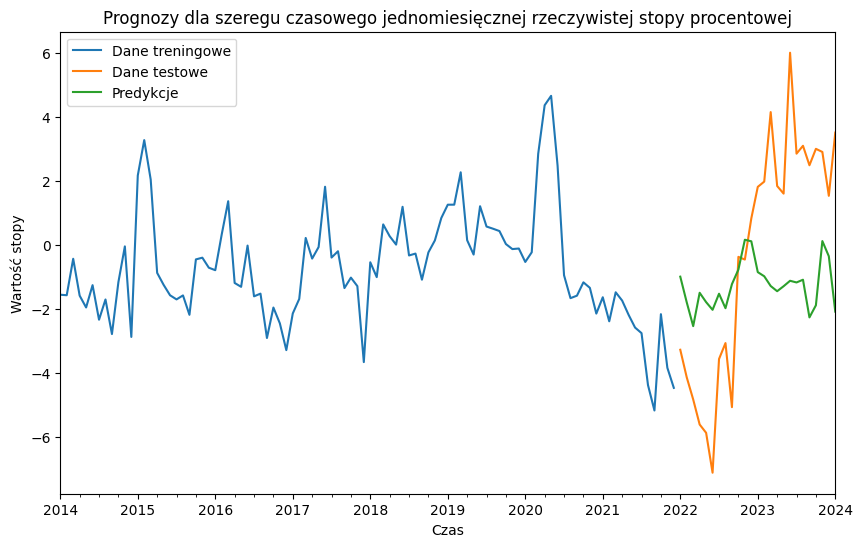

In [57]:
# Dodanie legendy i odpowiednich etykiet
plt.figure(figsize=(10, 6))  # Rozmiar wykresu

# Rysowanie danych treningowych
train_rate["REAL_INTEREST_RATE"].plot(label='Dane treningowe', legend=True)

# Rysowanie danych testowych
test_rate["REAL_INTEREST_RATE"].plot(label='Dane testowe', legend=True)

# Rysowanie przewidywań
test_rate["PREDICTIONS"].plot(label='Predykcje', legend=True)

# Dodanie tytułu i etykiet
plt.title('Prognozy dla szeregu czasowego jednomiesięcznej rzeczywistej stopy procentowej')
plt.xlabel('Czas')
plt.ylabel('Wartość stopy')

# Wyświetlenie legendy
plt.legend()

# Pokazanie wykresu
plt.show()



In [58]:
rmse = root_mean_squared_error(test_rate['REAL_INTEREST_RATE'], test_rate['PREDICTIONS'])
rmse

3.655143668426527

## CPI - po funkcji

In [59]:
model_cpi = modelLSTM(n_input, n_features)

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
true_pred_cpi, loss_cpi = gen_pred(model_cpi, train_cpi, test_cpi, n_input, n_features, 100)

Epoch 1/100


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0858
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065   
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029   
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040  
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015   
Epoch 13/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 14/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 15/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 
Epoc

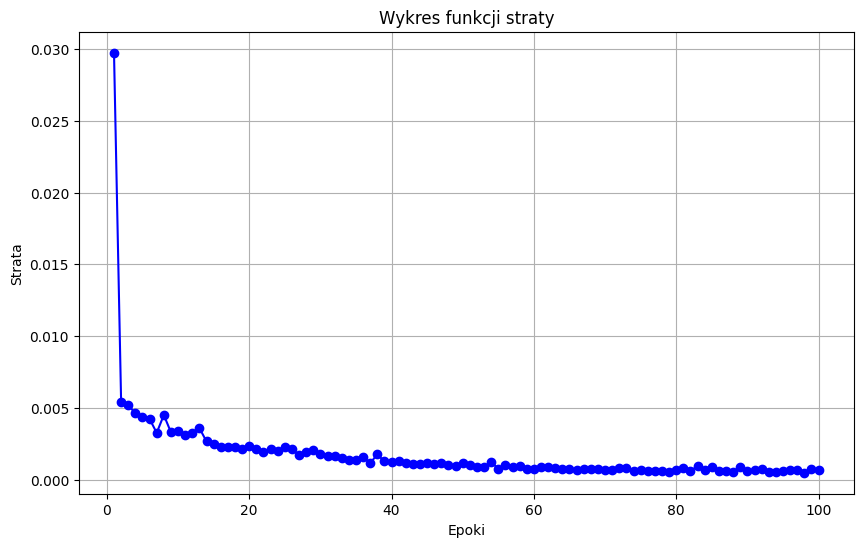

In [61]:
# Rysowanie wykresu
plt.figure(figsize=(10, 6))  # Rozmiar wykresu
plt.plot(range(1, len(loss_cpi) + 1), loss_cpi, marker='o', linestyle='-', color='b')
plt.title('Wykres funkcji straty')
plt.xlabel('Epoki')  # Oś X - liczba epok
plt.ylabel('Strata')  # Oś Y - wartość funkcji straty
#plt.ylim(0, 0.0005)
plt.grid(True)  # Dodanie siatki
plt.show()


In [62]:
test_cpi['PREDICTIONS'] = true_pred_cpi


C:\Users\Aldona\AppData\Local\Temp\ipykernel_27240\2232066245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cpi['PREDICTIONS'] = true_pred_cpi


<Axes: xlabel='DATE'>

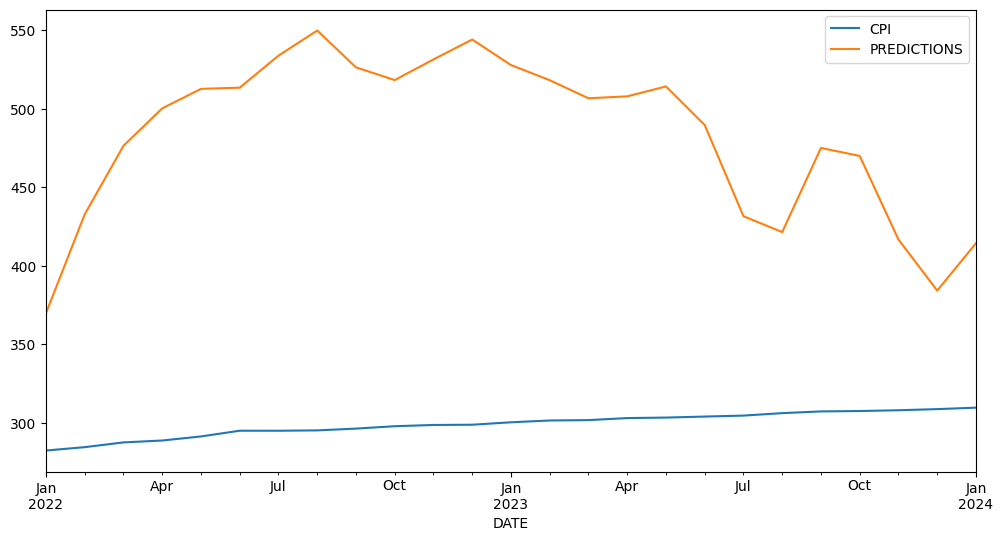

In [63]:
test_cpi.plot(figsize=(12,6))

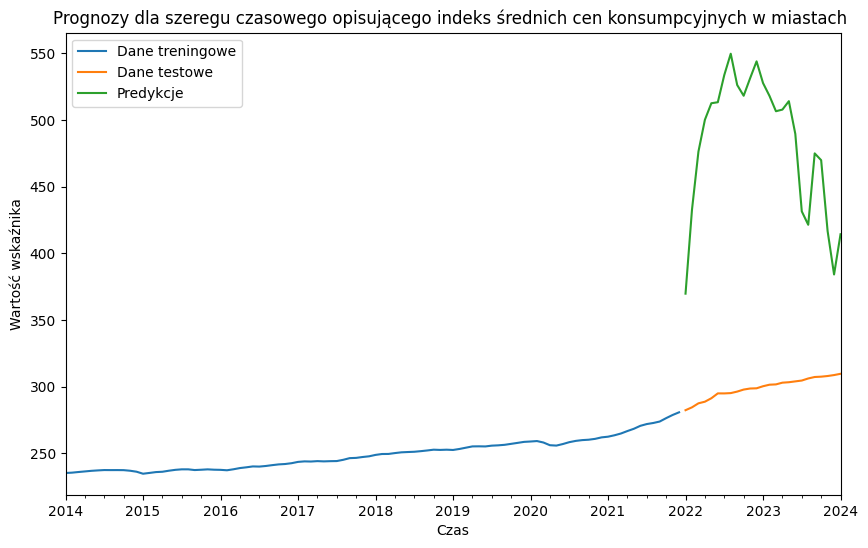

In [64]:
# Dodanie legendy i odpowiednich etykiet
plt.figure(figsize=(10, 6))  # Rozmiar wykresu

# Rysowanie danych treningowych
train_cpi["CPI"].plot(label='Dane treningowe', legend=True)

# Rysowanie danych testowych
test_cpi["CPI"].plot(label='Dane testowe', legend=True)

# Rysowanie przewidywań
test_cpi["PREDICTIONS"].plot(label='Predykcje', legend=True)

# Dodanie tytułu i etykiet
plt.title('Prognozy dla szeregu czasowego opisującego indeks średnich cen konsumpcyjnych w miastach ')
plt.xlabel('Czas')
plt.ylabel('Wartość wskaźnika')

# Wyświetlenie legendy
plt.legend()

# Pokazanie wykresu
plt.show()

In [65]:
import matplotlib.pyplot as plt

# Dodanie predykcji do test_cpi
test_cpi['PREDICTIONS'] = true_pred_cpi

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Rysowanie rzeczywistych danych CPI (z df_cpi)
plt.plot(df_cpi['DATE'], df_cpi['CPI'], label='DF_CPI - Rzeczywiste dane', color='blue')

# Rysowanie predykcji
plt.plot(test_cpi['DATE'], test_cpi['PREDICTIONS'], label='PREDICTIONS', color='orange')

# Dostosowanie wykresu
plt.xlabel('Data')
plt.ylabel('CPI')
plt.title('Porównanie danych rzeczywistych i predykcji')
plt.legend()
plt.grid()
plt.show()


C:\Users\Aldona\AppData\Local\Temp\ipykernel_27240\948112030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cpi['PREDICTIONS'] = true_pred_cpi


KeyError: 'DATE'

<Figure size 1200x600 with 0 Axes>

In [274]:
test_cpi

,CPI,PREDICTIONS
DATE,,
2022-01-01,282.390,369.669867
2022-02-01,284.535,432.251390
2022-03-01,287.553,476.853655
2022-04-01,288.764,487.685179
2022-05-01,291.359,493.756663
2022-06-01,294.996,495.727874
2022-07-01,294.977,516.450835
2022-08-01,295.209,531.800116
2022-09-01,296.341,513.903563


In [275]:
rmse = root_mean_squared_error(test_cpi['CPI'], test_cpi['PREDICTIONS'])
rmse

200.0716659790104

## Mat - po funkcji

In [276]:
model_mat = modelLSTM(n_input, n_features)

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
true_pred_mat, loss_mat = gen_pred(model_mat, train_mat, test_mat, n_input, n_features, 40)# 400

Epoch 1/40
57/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104
Epoch 4/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 5/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 6/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 7/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 8/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227
Epoch 9/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0369
Epoch 10/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 11/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 12/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 13/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072
Epoch 14/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 15/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 16/40
84/84 ━━━━━━━━━━━━

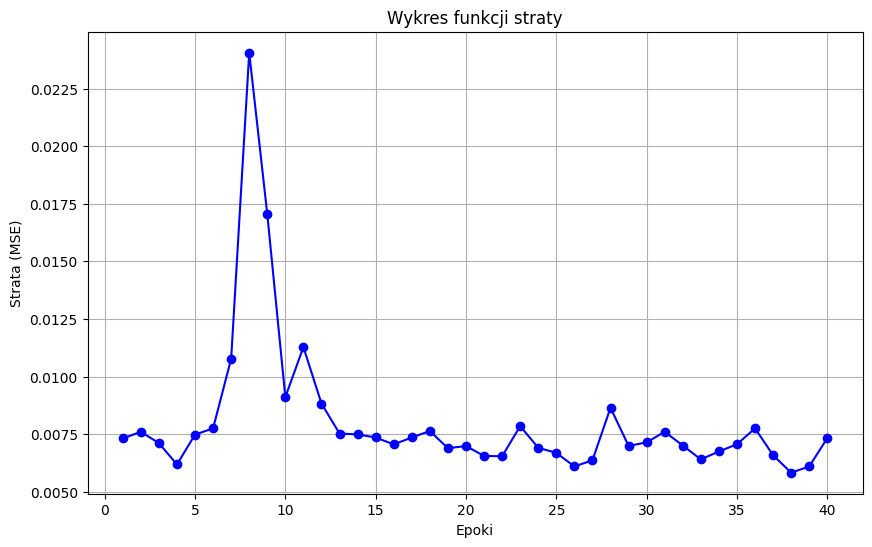

In [279]:
# Rysowanie wykresu
plt.figure(figsize=(10, 6))  # Rozmiar wykresu
plt.plot(range(1, len(loss_mat) + 1), loss_mat, marker='o', linestyle='-', color='b')
plt.title('Wykres funkcji straty')
plt.xlabel('Epoki')  # Oś X - liczba epok
plt.ylabel('Strata (MSE)')  # Oś Y - wartość funkcji straty
plt.grid(True)  # Dodanie siatki
plt.show()

In [280]:
test_mat['PREDICTIONS'] = true_pred_mat


C:\Users\Aldona\AppData\Local\Temp\ipykernel_50080\2699327772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_mat['PREDICTIONS'] = true_pred_mat


<Axes: xlabel='DATE'>

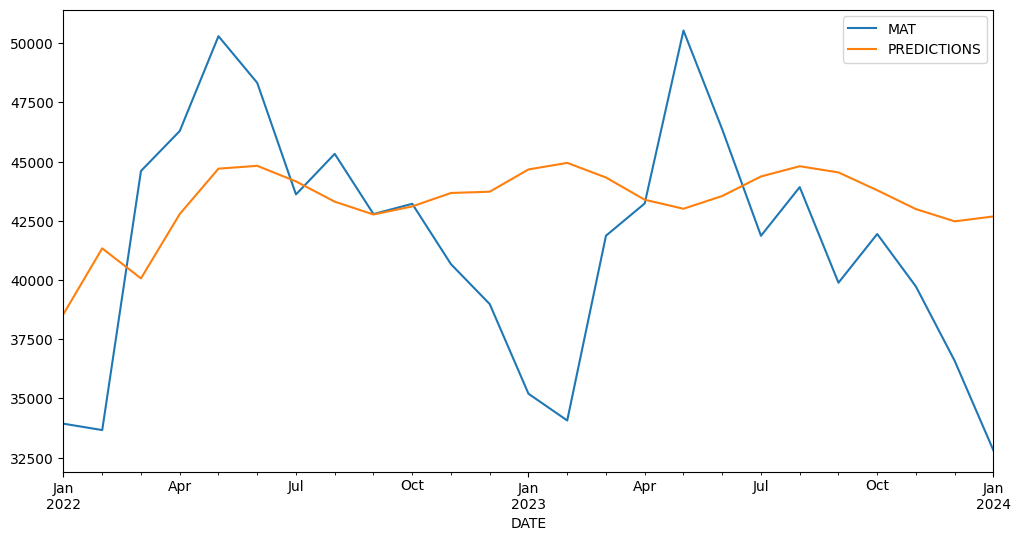

In [281]:
test_mat.plot(figsize=(12,6))

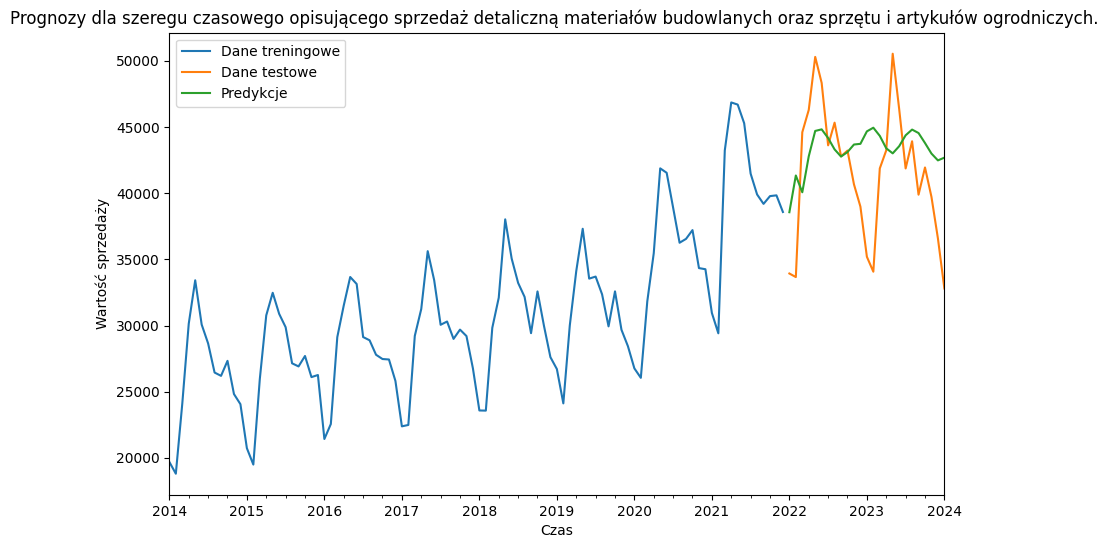

In [282]:
# Dodanie legendy i odpowiednich etykiet
plt.figure(figsize=(10, 6))  # Rozmiar wykresu

# Rysowanie danych treningowych
train_mat["MAT"].plot(label='Dane treningowe', legend=True)

# Rysowanie danych testowych
test_mat["MAT"].plot(label='Dane testowe', legend=True)

# Rysowanie przewidywań
test_mat["PREDICTIONS"].plot(label='Predykcje', legend=True)

# Dodanie tytułu i etykiet
plt.title('Prognozy dla szeregu czasowego opisującego sprzedaż detaliczną materiałów budowlanych oraz sprzętu i artykułów ogrodniczych. ')
plt.xlabel('Czas')
plt.ylabel('Wartość sprzedaży')

# Wyświetlenie legendy
plt.legend()

# Pokazanie wykresu
plt.show()

In [283]:
rmse = root_mean_squared_error(test_mat['MAT'], test_mat['PREDICTIONS'])
rmse

5086.943557709494

test na stacjonarność, zróżnicować, przedziały ufności

# Jak poprawić dokładność prognoz LSTM?



Aby poprawić dokładność prognoz modelu LSTM, można zastosować różne techniki i strategie. Poniżej znajduje się lista najważniejszych działań:

### 1. Dostosowanie hiperparametrów modelu
   - **Liczba neuronów w warstwie LSTM**: Zwiększ lub zmniejsz liczbę neuronów (np. spróbuj wartości takich jak 50, 100, 200), co wpłynie na zdolność modelu do wychwytywania złożoności danych.
   - **Liczba warstw LSTM i Dense**: Eksperymentuj z głębszymi sieciami, dodając dodatkowe warstwy LSTM lub Dense.
   - **Długość sekwencji wejściowej (`n_input`)**: Przetestuj różne długości sekwencji, np. 5, 10, 20 kroków czasowych. Krótsze sekwencje mogą być bardziej odpowiednie dla prostszych wzorców, a dłuższe mogą lepiej uchwycić złożone zależności.
   - **Wybór funkcji aktywacji**: Oprócz `relu`, wypróbuj `tanh`, która często sprawdza się w modelach LSTM, ponieważ stabilizuje wartości w przedziale (-1, 1).
   - **Dobór funkcji straty i optymalizatora**: Testuj różne funkcje straty, np. `mean_absolute_error` (MAE), która może być bardziej odporna na anomalia. Wypróbuj także inne optymalizatory, np. `RMSprop`.

### 2. Przetwarzanie i inżynieria cech
   - **Normalizacja/Standaryzacja danych**: Upewnij się, że dane są dobrze przeskalowane. W przypadku LSTM, funkcje aktywacji mogą działać lepiej, gdy wartości danych są przeskalowane w przedziale (-1, 1) lub (0, 1).
   - **Dodanie cech pomocniczych**: Jeśli masz dostęp do innych zmiennych (np. sezonowość, wskaźniki ekonomiczne), które mogą wpływać na szereg czasowy, spróbuj je uwzględnić w modelu.
   - **Różnicowanie**: Jeśli Twój szereg czasowy wykazuje silny trend, zastosowanie różnicowania (np. różnice pierwszego rzędu) może pomóc uzyskać bardziej stacjonarne dane, co ułatwia modelowi LSTM naukę.

### 3. Zmiana architektury modelu
   - **GRU zamiast LSTM**: Jednostki GRU (Gated Recurrent Units) mogą być bardziej efektywne w przypadku danych, w których wzorce są krótkotrwałe.
   - **Architektura dwukierunkowa (Bidirectional LSTM)**: Uwzględnienie informacji zarówno z przeszłości, jak i z przyszłości może poprawić dokładność prognoz w niektórych przypadkach.

### 4. Użycie technik wzmacniających
   - **Regularization (Dropout)**: Dodanie `Dropout` w warstwach LSTM pomaga ograniczyć przeuczenie, co poprawia generalizację modelu.
   - **Early stopping**: Wczesne zatrzymanie (`early stopping`) pozwala przerwać trenowanie, gdy model przestaje się poprawiać na zbiorze walidacyjnym, co pomaga uniknąć przeuczenia.

### 5. Zwiększenie danych treningowych
   - Jeśli masz dłuższe szeregi czasowe, rozważ zwiększenie zestawu treningowego, co pomoże modelowi nauczyć się bardziej kompleksowych wzorców. W przypadku ograniczonej ilości danych możesz zastosować techniki sztucznego zwiększenia danych, takie jak augmentacja czasowa.

### 6. Użycie kombinacji modeli
   - **Ensemble modeli**: Połączenie prognoz z kilku modeli (np. LSTM i ARIMA lub LSTM i regresji liniowej) może prowadzić do bardziej stabilnych i dokładnych prognoz.
   - **Hybrid ARIMA-LSTM**: Często stosowaną praktyką jest trenowanie ARIMA do wychwytywania liniowych wzorców, a następnie LSTM do bardziej nieliniowych komponentów. Prognozy z obu modeli można łączyć, aby uzyskać bardziej precyzyjny wynik.

### 7. Tunowanie hiperparametrów przy użyciu wyszukiwania sieciowego lub losowego
   - Skorzystaj z metod automatycznego dobierania hiperparametrów, takich jak `GridSearchCV` lub `RandomizedSearchCV` (dostępnych np. w `KerasTuner`), aby systematycznie przetestować różne wartości parametrów i wybrać najlepszy zestaw.


# Różnicowanie proste

In [284]:
# Różnicowanie kolumny REAL_INTEREST_RATE
df_rate['DIFF_REAL_INTEREST_RATE'] = df_rate['REAL_INTEREST_RATE'].diff()

# Predykcja szeregu z cyklicznością (rate)

In [285]:
# Normalizacja danych REAL_INTEREST_RATE
scaler_rate = MinMaxScaler(feature_range=(0, 1))
scaled_data_rate = scaler_rate.fit_transform(df_rate)

# Funkcja tworząca sekwencje dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Parametry
sequence_length = 12  # Długość sekwencji wejściowych

# Podział danych na zbiór treningowy i testowy
train_size_rate = 96  # Pierwsze 96 miesięcy to zbiór treningowy
train_data_rate = scaled_data_rate[:train_size_rate]
test_data_rate = scaled_data_rate[train_size_rate - sequence_length:]

# Generowanie sekwencji
X_train_rate, y_train_rate = create_sequences(train_data_rate, sequence_length)
X_test_rate, y_test_rate = create_sequences(test_data_rate, sequence_length)

# Zmiana kształtu danych dla LSTM: (samples, timesteps, features)
X_train_rate = X_train_rate.reshape((X_train_rate.shape[0], X_train_rate.shape[1], 1))
X_test_rate = X_test_rate.reshape((X_test_rate.shape[0], X_test_rate.shape[1], 1))


In [286]:
# Budowa modelu LSTM
model_rate = Sequential()
model_rate.add(LSTM(100, activation='tanh', return_sequences=False, input_shape=(sequence_length, 1)))
model_rate.add(Dense(1))  # Warstwa wyjściowa
model_rate.compile(optimizer='adam', loss='mse')
model_rate.summary()



c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [287]:
# Trenowanie modelu
history_rate = model_rate.fit(X_train_rate, y_train_rate, 
                              epochs=250, 
                              batch_size=12, 
                              validation_data=(X_test_rate, y_test_rate), 
                              verbose=1)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1886 - val_loss: 0.0154
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - val_loss: 0.0428
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - val_loss: 0.0186
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - val_loss: 0.0176
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - val_loss: 0.0255
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - val_loss: 0.0302
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - val_loss: 0.0258
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0251
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - val_loss: 0.0262
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0284
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - val_loss: 0.0259
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0270


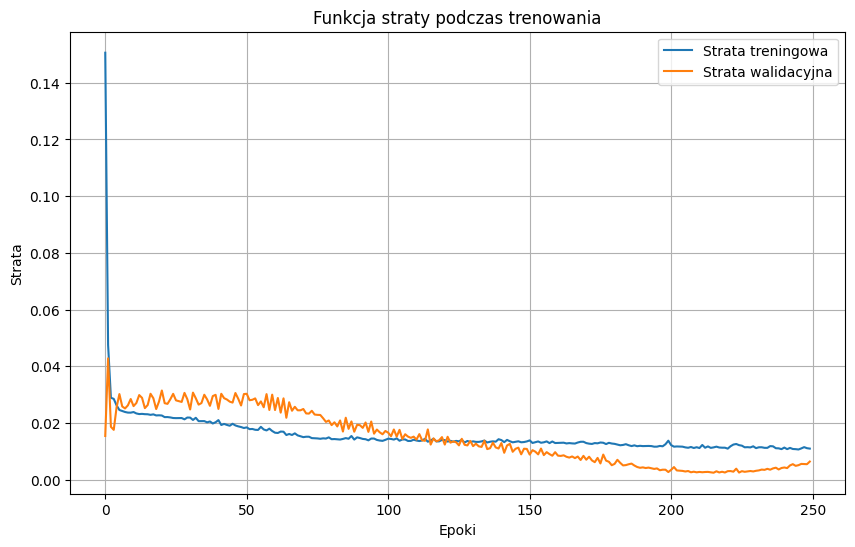

In [288]:
# Wyświetlenie funkcji straty (loss function)
plt.figure(figsize=(10, 6))
plt.plot(history_rate.history['loss'], label='Strata treningowa')
plt.plot(history_rate.history['val_loss'], label='Strata walidacyjna')
plt.title('Funkcja straty podczas trenowania')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


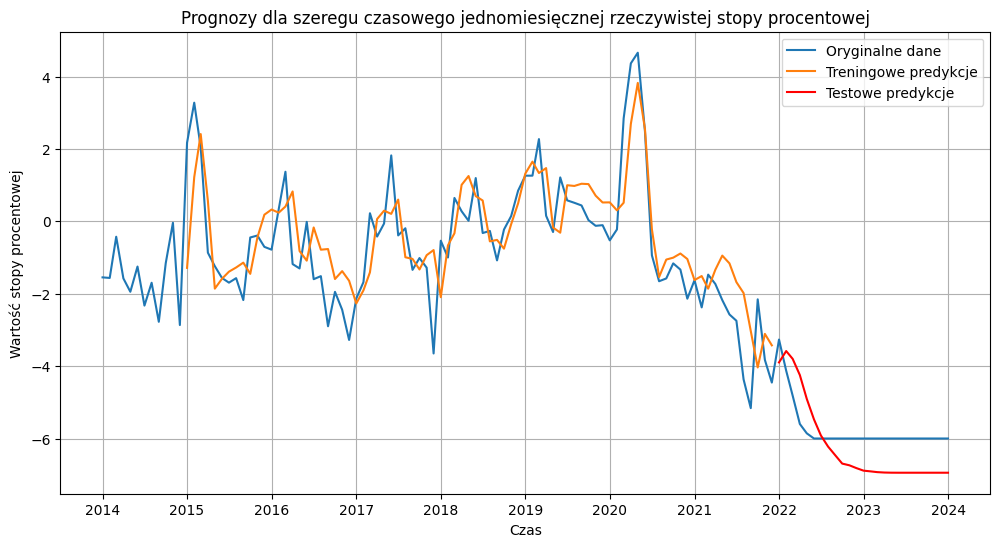

In [289]:
# Prognoza
train_predict_rate = model_rate.predict(X_train_rate)
test_predict_rate = model_rate.predict(X_test_rate)

# Odskalowanie danych
train_predict_rate = scaler_rate.inverse_transform(np.concatenate((train_predict_rate, np.zeros((train_predict_rate.shape[0], 1))), axis=1))[:, 0]
test_predict_rate = scaler_rate.inverse_transform(np.concatenate((test_predict_rate, np.zeros((test_predict_rate.shape[0], 1))), axis=1))[:, 0]

y_train_rescaled_rate = scaler_rate.inverse_transform(np.concatenate((y_train_rate.reshape(-1, 1), np.zeros((y_train_rate.shape[0], 1))), axis=1))[:, 0]
y_test_rescaled_rate = scaler_rate.inverse_transform(np.concatenate((y_test_rate.reshape(-1, 1), np.zeros((y_test_rate.shape[0], 1))), axis=1))[:, 0]

# Wyświetlenie wyników
plt.figure(figsize=(12, 6))
plt.plot(data_rate.index, data_rate['REAL_INTEREST_RATE'], label="Oryginalne dane",)
plt.plot(data_rate.index[sequence_length:sequence_length+len(train_predict_rate)], train_predict_rate, label="Treningowe predykcje")
plt.plot(data_rate.index[96:], test_predict_rate, label="Testowe predykcje", color = 'red')

# Dodanie tytułu i etykiet
plt.title("Prognozy dla szeregu czasowego jednomiesięcznej rzeczywistej stopy procentowej")
plt.xlabel("Czas")
plt.ylabel("Wartość stopy procentowej")
plt.legend()
plt.grid()
plt.show()


In [290]:
from sklearn.metrics import mean_squared_error

# Obliczenie błędów
train_rmse_rate = np.sqrt(mean_squared_error(y_train_rescaled_rate, train_predict_rate))
test_rmse_rate = np.sqrt(mean_squared_error(y_test_rescaled_rate, test_predict_rate))

print("RMSE dla zbioru treningowego:", train_rmse_rate)
print("RMSE dla zbioru testowego:", test_rmse_rate)


RMSE dla zbioru treningowego: 1.1195877647573453
RMSE dla zbioru testowego: 0.8511453404205139


# Predykcja szeregu z trendem (CPI)

Zgadza się że pomiędzy 2014-01, a 2024-01 powinno być tyle miesięcy (10 lat plus miesiąc). Podzielimy dane na część testową i treningową. Do początku roku 2023 dane treningowe, pozostałe dane testowe.

In [163]:
# Normalizacja danych CPI
scaler_cpi = MinMaxScaler(feature_range=(0, 1))
scaled_data_cpi = scaler_cpi.fit_transform(df_cpi)

# Funkcja tworząca sekwencje dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Parametry
sequence_length = 12  # Długość sekwencji wejściowych

# Podział danych na zbiór treningowy i testowy
train_size = int(len(scaled_data_cpi) * 0.8)
train_data_cpi = scaled_data_cpi[:train_size]
test_data_cpi = scaled_data_cpi[train_size - sequence_length:]

# Generowanie sekwencji
X_train_cpi, y_train_cpi = create_sequences(train_data_cpi, sequence_length)
X_test_cpi, y_test_cpi = create_sequences(test_data_cpi, sequence_length)

# Zmiana kształtu danych dla LSTM: (samples, timesteps, features)
X_train_cpi = X_train_cpi.reshape((X_train_cpi.shape[0], X_train_cpi.shape[1], 1))
X_test_cpi = X_test_cpi.reshape((X_test_cpi.shape[0], X_test_cpi.shape[1], 1))


In [ ]:
# Budowa modelu LSTM
model_cpi = Sequential()
model_cpi.add(LSTM(100, activation='tanh', return_sequences=False, input_shape=(sequence_length, 1)))
model_cpi.add(Dense(1))  # Warstwa wyjściowa
model_cpi.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
history_cpi = model_cpi.fit(X_train_cpi, y_train_cpi, epochs=650, batch_size=12, validation_data=(X_test_cpi, y_test_cpi), verbose=1)


Epoch 1/650


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0363 - val_loss: 0.0378
Epoch 2/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 3/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0358
Epoch 4/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0061
Epoch 5/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4886e-04 - val_loss: 0.0135
Epoch 6/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8652e-04 - val_loss: 0.0041
Epoch 7/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5113e-04 - val_loss: 0.0124
Epoch 8/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8398e-04 - val_loss: 0.0201
Epoch 9/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1326e-04 - val_loss: 0.0092
Epoch 10/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5041e-04 - val_loss: 0.0150
Epoch 11/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1150e-04 - val_loss: 0.0117
Epoch 12/650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2477e-04

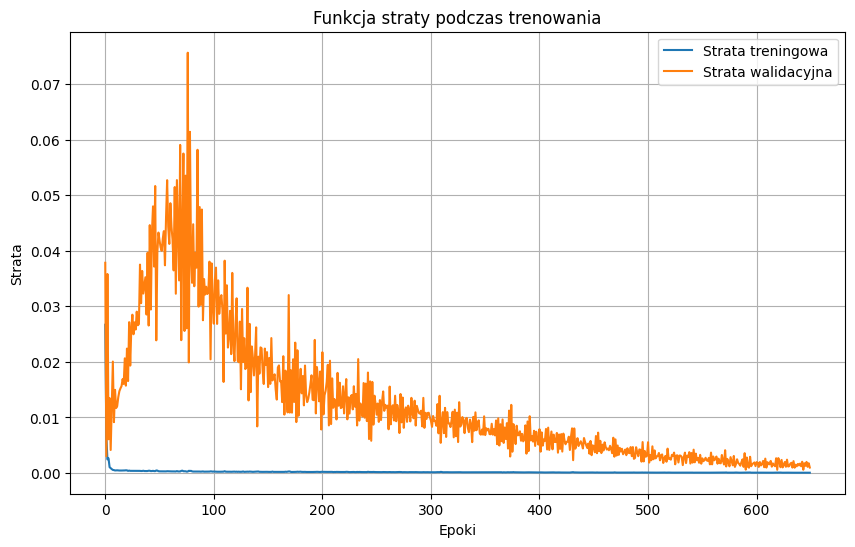

In [ ]:
# Wyświetlenie funkcji straty (loss function)
plt.figure(figsize=(10, 6))
plt.plot(history_cpi.history['loss'], label='Strata treningowa')
plt.plot(history_cpi.history['val_loss'], label='Strata walidacyjna')
plt.title('Funkcja straty podczas trenowania')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


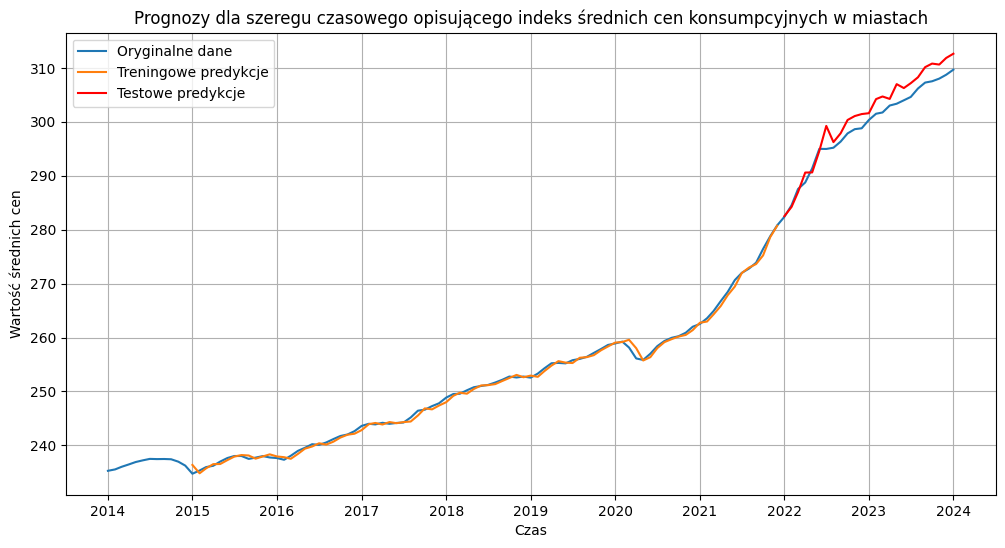

In [ ]:
# Prognoza
train_predict_cpi = model_cpi.predict(X_train_cpi)
test_predict_cpi = model_cpi.predict(X_test_cpi)

# Odskaowanie danych
train_predict_cpi = scaler_cpi.inverse_transform(np.concatenate((train_predict_cpi, np.zeros((train_predict_cpi.shape[0], 1))), axis=1))[:, 0]
test_predict_cpi = scaler_cpi.inverse_transform(np.concatenate((test_predict_cpi, np.zeros((test_predict_cpi.shape[0], 1))), axis=1))[:, 0]

y_train_rescaled_cpi = scaler_cpi.inverse_transform(np.concatenate((y_train_cpi.reshape(-1, 1), np.zeros((y_train_cpi.shape[0], 1))), axis=1))[:, 0]
y_test_rescaled_cpi = scaler_cpi.inverse_transform(np.concatenate((y_test_cpi.reshape(-1, 1), np.zeros((y_test_cpi.shape[0], 1))), axis=1))[:, 0]

# Wyświetlenie wyników
# Wyświetlenie wyników
plt.figure(figsize=(12, 6))
plt.plot(data_cpi.index, data_cpi['CPI'], label="Oryginalne dane")
plt.plot(data_cpi.index[sequence_length:sequence_length+len(train_predict_cpi)], train_predict_cpi, label="Treningowe predykcje")
plt.plot(data_cpi.index[train_size:], test_predict_cpi, label="Testowe predykcje", color = 'red')

# Dodanie tytułu i etykiet
plt.title("Prognozy dla szeregu czasowego opisującego indeks średnich cen konsumpcyjnych w miastach")
plt.xlabel("Czas")
plt.ylabel("Wartość średnich cen")
plt.legend()
plt.grid()
plt.show()



In [167]:
from sklearn.metrics import mean_squared_error

# Obliczenie błędów
train_rmse_cpi = np.sqrt(mean_squared_error(y_train_rescaled_cpi, train_predict_cpi))
test_rmse_cpi = np.sqrt(mean_squared_error(y_test_rescaled_cpi, test_predict_cpi))

print("RMSE dla zbioru treningowego:", train_rmse_cpi)
print("RMSE dla zbioru testowego:", test_rmse_cpi)


RMSE dla zbioru treningowego: 0.5405636755596752
RMSE dla zbioru testowego: 2.3480670800606864


# Predykcje szeregu z sezonowością (mat)

In [168]:
# Normalizacja danych MAT
scaler_mat = MinMaxScaler(feature_range=(0, 1))
scaled_data_mat = scaler_mat.fit_transform(df_materials)
data_mat = df_materials
# Funkcja tworząca sekwencje dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Parametry
sequence_length = 10  # Długość sekwencji wejściowych

# Podział danych na zbiór treningowy i testowy
train_size = int(len(scaled_data_mat) * 0.8)
train_data_mat = scaled_data_mat[:train_size]
test_data_mat = scaled_data_mat[train_size - sequence_length:]

# Generowanie sekwencji
X_train_mat, y_train_mat = create_sequences(train_data_mat, sequence_length)
X_test_mat, y_test_mat = create_sequences(test_data_mat, sequence_length)

# Zmiana kształtu danych dla LSTM: (samples, timesteps, features)
X_train_mat = X_train_mat.reshape((X_train_mat.shape[0], X_train_mat.shape[1], 1))
X_test_mat = X_test_mat.reshape((X_test_mat.shape[0], X_test_mat.shape[1], 1))


In [ ]:
# Budowa modelu LSTM
model_mat = Sequential()
model_mat.add(LSTM(100, activation='tanh', return_sequences=False, input_shape=(sequence_length, 1)))
model_mat.add(Dense(1))  # Warstwa wyjściowa
model_mat.compile(optimizer='adam', loss='mse')

# Trenowanie modelu
history_mat = model_mat.fit(X_train_mat, y_train_mat, epochs=300, batch_size=16, validation_data=(X_test_mat, y_test_mat), verbose=1)


Epoch 1/300


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0960 - val_loss: 0.0418
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.0597
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - val_loss: 0.0360
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0531
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0391
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - val_loss: 0.0313
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_loss: 0.0314
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - val_loss: 0.0327
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - val_loss: 0.0317
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 - val_loss: 0.0315
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - val_loss: 0.0309
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - val_loss: 0.0308
Epoch 13/300

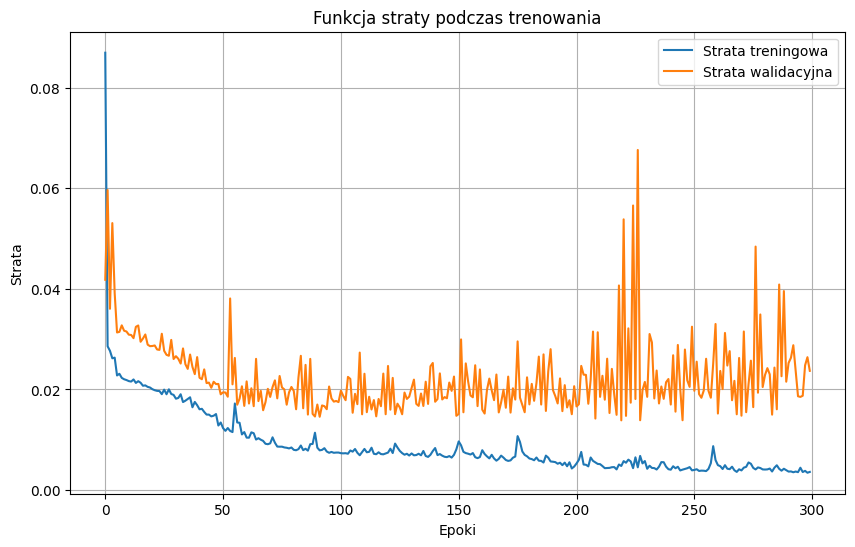

In [ ]:
# Wyświetlenie funkcji straty (loss function)
plt.figure(figsize=(10, 6))
plt.plot(history_mat.history['loss'], label='Strata treningowa')
plt.plot(history_mat.history['val_loss'], label='Strata walidacyjna')
plt.title('Funkcja straty podczas trenowania')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.grid(True)
plt.show()

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/stepWARNING:tensorflow:5 out of the last 25 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017D47AC1750> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


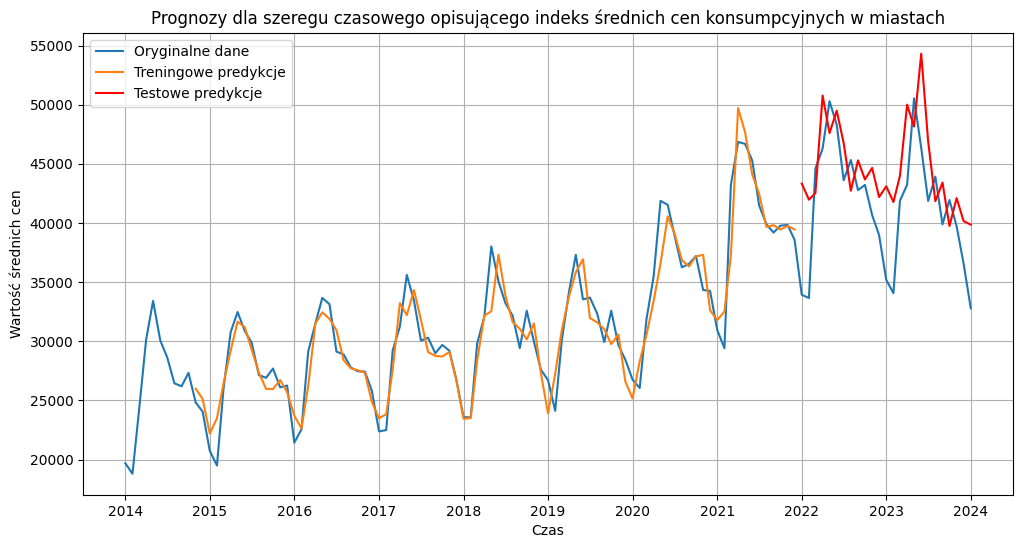

In [ ]:
# Prognoza
train_predict_mat = model_mat.predict(X_train_mat)
test_predict_mat = model_mat.predict(X_test_mat)

# Odskaowanie danych
train_predict_mat = scaler_mat.inverse_transform(np.concatenate((train_predict_mat, np.zeros((train_predict_mat.shape[0], 1))), axis=1))[:, 0]
test_predict_mat = scaler_mat.inverse_transform(np.concatenate((test_predict_mat, np.zeros((test_predict_mat.shape[0], 1))), axis=1))[:, 0]

y_train_rescaled_mat = scaler_mat.inverse_transform(np.concatenate((y_train_mat.reshape(-1, 1), np.zeros((y_train_mat.shape[0], 1))), axis=1))[:, 0]
y_test_rescaled_mat = scaler_mat.inverse_transform(np.concatenate((y_test_mat.reshape(-1, 1), np.zeros((y_test_mat.shape[0], 1))), axis=1))[:, 0]

# Wyświetlenie wyników
plt.figure(figsize=(12, 6))
plt.plot(data_mat.index, data_mat['MAT'], label="Oryginalne dane")
plt.plot(data_mat.index[sequence_length:sequence_length+len(train_predict_mat)], train_predict_mat, label="Treningowe predykcje")
plt.plot(data_mat.index[train_size:], test_predict_mat, label="Testowe predykcje", color = 'red')

# Dodanie tytułu i etykiet
plt.title("Prognozy dla szeregu czasowego opisującego indeks średnich cen konsumpcyjnych w miastach")
plt.xlabel("Czas")
plt.ylabel("Wartość średnich cen")
plt.legend()
plt.grid()
plt.show()


In [172]:
from sklearn.metrics import mean_squared_error

# Obliczenie błędów
train_rmse_mat = np.sqrt(mean_squared_error(y_train_rescaled_mat, train_predict_mat))
test_rmse_mat = np.sqrt(mean_squared_error(y_test_rescaled_mat, test_predict_mat))

print("RMSE dla zbioru treningowego:", train_rmse_mat)
print("RMSE dla zbioru testowego:", test_rmse_mat)


RMSE dla zbioru treningowego: 1834.408783121201
RMSE dla zbioru testowego: 4884.845629531648


# ---

In [ ]:
train_mat = df_materials[:96]
test_mat = df_materials[96:]

In [174]:
n_input = 12
n_features = 1
model_mat = modelLSTM(n_input, n_features)

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
true_pred_mat = gen_pred(model_mat, train_mat, test_mat, n_input, n_features, 75)


c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1412
Epoch 2/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0709
Epoch 3/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0609
Epoch 4/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0585
Epoch 5/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0474
Epoch 6/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374
Epoch 7/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243
Epoch 8/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282
Epoch 9/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222
Epoch 10/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0324
Epoch 11/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0377
Epoch 12/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272
Epoch 13/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209
Epoch 14/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212
Epoch 15/75
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213
Epoch 16/75
84/84 ━

In [ ]:
test_mat['PREDICTIONS'] = true_pred_mat
test_mat.plot(figsize=(12,6))

ValueError: Length of values (2) does not match length of index (25)

# Test stacjonarności danych - rate

In [534]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# 1. Test Dickeya-Fullera (ADF)
def adf_test(series):
    result = adfuller(series)
    print("Test Dickeya-Fullera:")
    print(f"Statystyka testowa: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Liczba opóźnień: {result[2]}")
    print(f"Liczba obserwacji: {result[3]}")
    print("Wartości krytyczne:", result[4])
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.")

# 2. Test Phillipsa-Perrona
def pp_test(series):
    result = PhillipsPerron(series)
    print("\nTest Phillipsa-Perrona:")
    print(f"Statystyka testowa: {result.stat}")
    print(f"P-value: {result.pvalue}")
    if result.pvalue <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.")

# 3. Test KPSS
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print("\nTest KPSS:")
    print(f"Statystyka testowa: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Wartości krytyczne:", result[3])
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.")



In [535]:
print("Wyniki testów stacjonarności dla szeregu pierwszego (df_rate)")
adf_test(df_rate['REAL_INTEREST_RATE'])
pp_test(df_rate['REAL_INTEREST_RATE'])
kpss_test(df_rate['REAL_INTEREST_RATE'])

Wyniki testów stacjonarności dla szeregu pierwszego (df_rate)
Test Dickeya-Fullera:
Statystyka testowa: -1.800831403563697
P-value: 0.3800490030086589
Liczba opóźnień: 6
Liczba obserwacji: 114
Wartości krytyczne: {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -3.691711098279078
P-value: 0.004231267175176973
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.11083851876425525
P-value: 0.1
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\3938625759.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [523]:
df_rate

,REAL_INTEREST_RATE
DATE,
2014-01-01,-1.547831
2014-02-01,-1.563561
2014-03-01,-0.425359
2014-04-01,-1.576272
2014-05-01,-1.945522
...,...
2023-09-01,2.492336
2023-10-01,3.005341
2023-11-01,2.907568


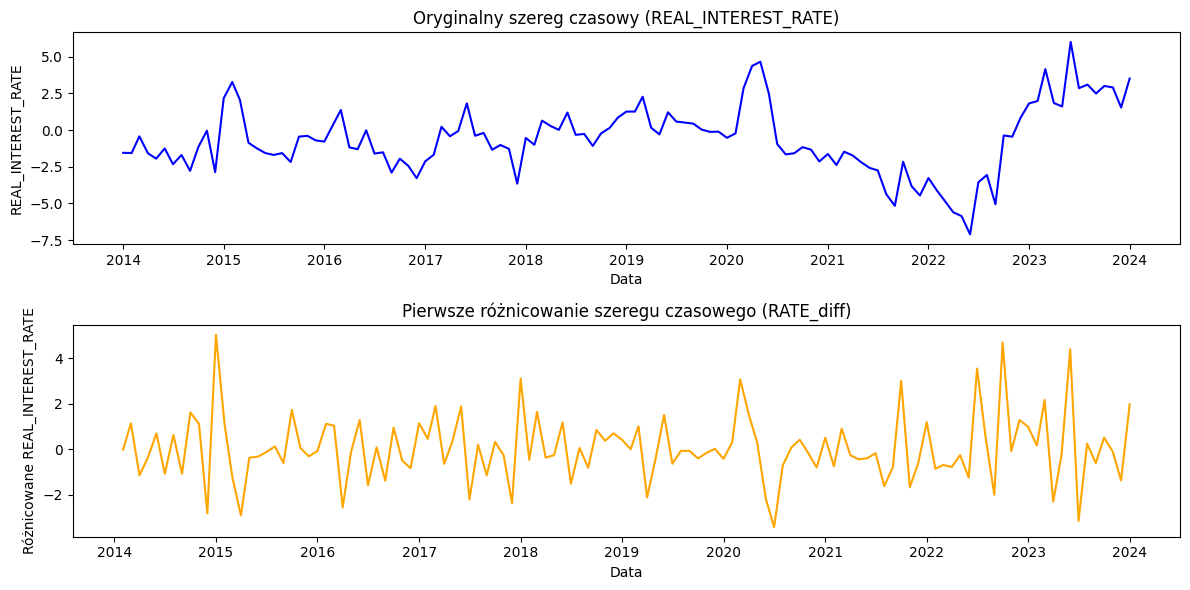

In [529]:
# Pierwsze różnicowanie szeregu
df_rate['RATE_diff'] = df_rate['REAL_INTEREST_RATE'].diff()

# Wykres przed i po różnicowaniu
plt.figure(figsize=(12, 6))

# Oryginalny szereg
plt.subplot(2, 1, 1)
plt.plot(df_rate.index, df_rate['REAL_INTEREST_RATE'], color='blue')
plt.title('Oryginalny szereg czasowy (REAL_INTEREST_RATE)')
plt.xlabel('Data')
plt.ylabel('REAL_INTEREST_RATE')

# Zróżnicowany szereg
plt.subplot(2, 1, 2)
plt.plot(df_rate.index, df_rate['RATE_diff'], color='orange')
plt.title('Pierwsze różnicowanie szeregu czasowego (RATE_diff)')
plt.xlabel('Data')
plt.ylabel('Różnicowane REAL_INTEREST_RATE')

plt.tight_layout()
plt.show()


In [536]:
# Usunięcie wartości NaN po różnicowaniu
rate_diff = df_rate['RATE_diff'].dropna() 

print("Wyniki testów stacjonarności dla szeregu pierwszego (df_rate)")
adf_test(rate_diff)
pp_test(rate_diff)
kpss_test(rate_diff)

Wyniki testów stacjonarności dla szeregu pierwszego (df_rate)
Test Dickeya-Fullera:
Statystyka testowa: -6.254334886115214
P-value: 4.3761293906436355e-08
Liczba opóźnień: 5
Liczba obserwacji: 114
Wartości krytyczne: {'1%': -3.489057523907491, '5%': -2.887246327182993, '10%': -2.5804808802708528}
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -15.449138331931053
P-value: 2.7991672395906277e-28
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.09207132932132651
P-value: 0.1
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\3938625759.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


# Test stacjonarności danych - cpi

In [541]:
print("Wyniki testów stacjonarności dla szeregu pierwszego (df_cpi)")
adf_test(df_cpi['CPI'])
pp_test(df_cpi['CPI'])
kpss_test(df_cpi['CPI'])

Wyniki testów stacjonarności dla szeregu pierwszego (df_cpi)
Test Dickeya-Fullera:
Statystyka testowa: 0.4649588398766165
P-value: 0.983768221407472
Liczba opóźnień: 7
Liczba obserwacji: 113
Wartości krytyczne: {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: 2.4650773481189323
P-value: 0.9990377163380877
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test KPSS:
Statystyka testowa: 1.6359283085089014
P-value: 0.01
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


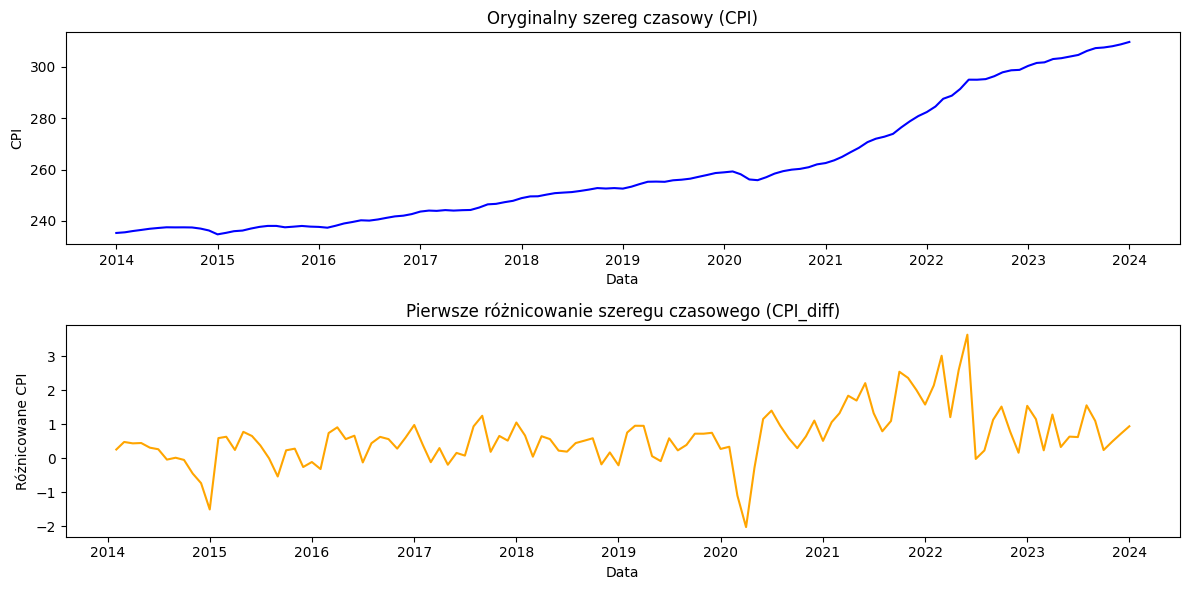

In [547]:
# Pierwsze różnicowanie szeregu
df_cpi['CPI_diff'] = df_cpi['CPI'].diff()

# Wykres przed i po różnicowaniu
plt.figure(figsize=(12, 6))

# Oryginalny szereg
plt.subplot(2, 1, 1)
plt.plot(df_cpi.index, df_cpi['CPI'], color='blue')
plt.title('Oryginalny szereg czasowy (CPI)')
plt.xlabel('Data')
plt.ylabel('CPI')

# Zróżnicowany szereg
plt.subplot(2, 1, 2)
plt.plot(df_cpi.index, df_cpi['CPI_diff'], color='orange')
plt.title('Pierwsze różnicowanie szeregu czasowego (CPI_diff)')
plt.xlabel('Data')
plt.ylabel('Różnicowane CPI')

plt.tight_layout()
plt.show()

In [543]:
# Usunięcie wartości NaN po różnicowaniu
cpi_diff = df_cpi['CPI_diff'].dropna() 

print("Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)")
adf_test(cpi_diff)
pp_test(cpi_diff)
kpss_test(cpi_diff)

Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)
Test Dickeya-Fullera:
Statystyka testowa: -1.80715265175545
P-value: 0.37691642737292963
Liczba opóźnień: 6
Liczba obserwacji: 113
Wartości krytyczne: {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -6.3809570414297925
P-value: 2.2230257696305638e-08
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.9498110585438464
P-value: 0.01
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [546]:
# Drugie różnicowanie szeregu
df_cpi['CPI_diff2'] = df_cpi['CPI_diff'].diff()

# Usunięcie NaN po różnicowaniu
cpi_diff2 = df_cpi['CPI_diff2'].dropna()

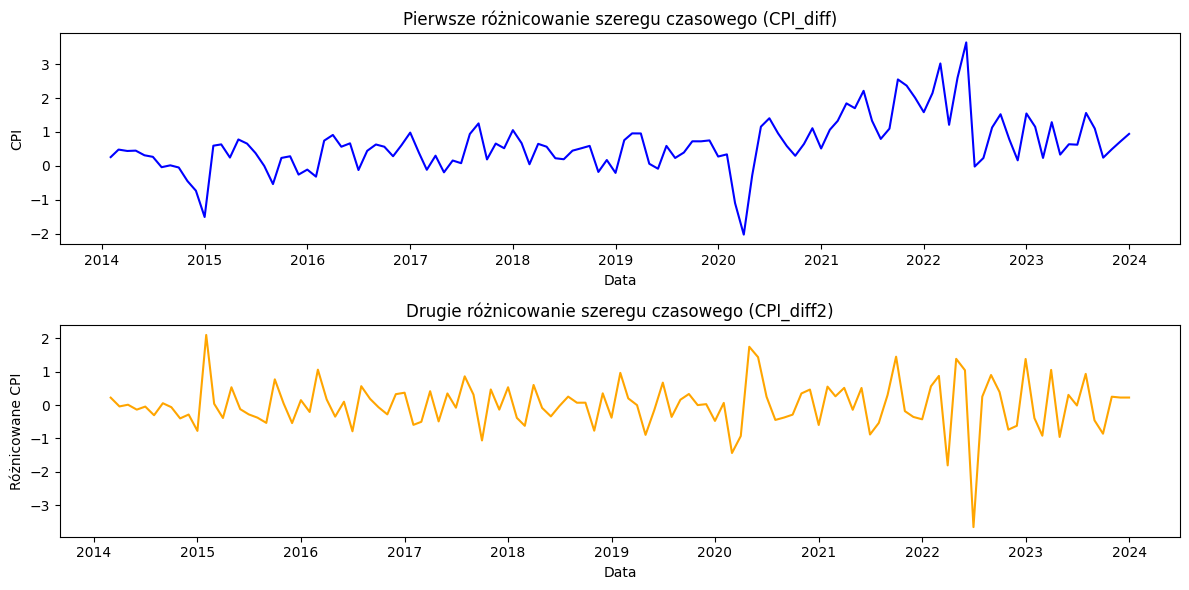

In [548]:
# Wykres przed i po różnicowaniu
plt.figure(figsize=(12, 6))

# Oryginalny szereg
plt.subplot(2, 1, 1)
plt.plot(df_cpi.index, df_cpi['CPI_diff'], color='blue')
plt.title('Pierwsze różnicowanie szeregu czasowego (CPI_diff)')
plt.xlabel('Data')
plt.ylabel('CPI')

# Zróżnicowany szereg
plt.subplot(2, 1, 2)
plt.plot(df_cpi.index, df_cpi['CPI_diff2'], color='orange')
plt.title('Drugie różnicowanie szeregu czasowego (CPI_diff2)')
plt.xlabel('Data')
plt.ylabel('Różnicowane CPI')

plt.tight_layout()
plt.show()

In [549]:
# Usunięcie wartości NaN po różnicowaniu
cpi_diff2 = df_cpi['CPI_diff2'].dropna() 

print("Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)")
adf_test(cpi_diff2)
pp_test(cpi_diff2)
kpss_test(cpi_diff2)

Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)
Test Dickeya-Fullera:
Statystyka testowa: -7.821415727482808
P-value: 6.6546163646195385e-12
Liczba opóźnień: 5
Liczba obserwacji: 113
Wartości krytyczne: {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -19.9853136645572
P-value: 0.0
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.19715900759356586
P-value: 0.1
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [530]:
# 1. Test Dickeya-Fullera (ADF)
def adf_test(series):
    result = adfuller(series)
    print("Test Dickeya-Fullera:")
    print(f"Statystyka testowa: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Liczba opóźnień: {result[2]}")
    print(f"Liczba obserwacji: {result[3]}")
    print("Wartości krytyczne:", result[4])
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.")

# 2. Test Phillipsa-Perrona
def pp_test(series):
    result = PhillipsPerron(series)
    print("\nTest Phillipsa-Perrona:")
    print(f"Statystyka testowa: {result.stat}")
    print(f"P-value: {result.pvalue}")
    if result.pvalue <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.")

# 3. Test KPSS
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print("\nTest KPSS:")
    print(f"Statystyka testowa: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Wartości krytyczne:", result[3])
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.")
    else:
        print("Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.")


print("Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)")
adf_test(df_cpi['CPI'])
pp_test(df_cpi['CPI'])
kpss_test(df_cpi['CPI'])

Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)
Test Dickeya-Fullera:
Statystyka testowa: 0.4649588398766165
P-value: 0.983768221407472
Liczba opóźnień: 7
Liczba obserwacji: 113
Wartości krytyczne: {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: 2.4650773481189323
P-value: 0.9990377163380877
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test KPSS:
Statystyka testowa: 1.6359283085089014
P-value: 0.01
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\3577586124.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


# Test stacjonarności danych - mat

In [551]:
print("Wyniki testów stacjonarności dla szeregu trzeciego (df_materials)")
adf_test(df_materials['MAT'])
pp_test(df_materials['MAT'])
kpss_test(df_materials['MAT'])

Wyniki testów stacjonarności dla szeregu trzeciego (df_materials)
Test Dickeya-Fullera:
Statystyka testowa: -0.5560137905254044
P-value: 0.8806146270444792
Liczba opóźnień: 12
Liczba obserwacji: 108
Wartości krytyczne: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -2.8016882734502504
P-value: 0.058033014609137186
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test KPSS:
Statystyka testowa: 1.5384020504071987
P-value: 0.01
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Odrzucamy hipotezę zerową – szereg nie jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


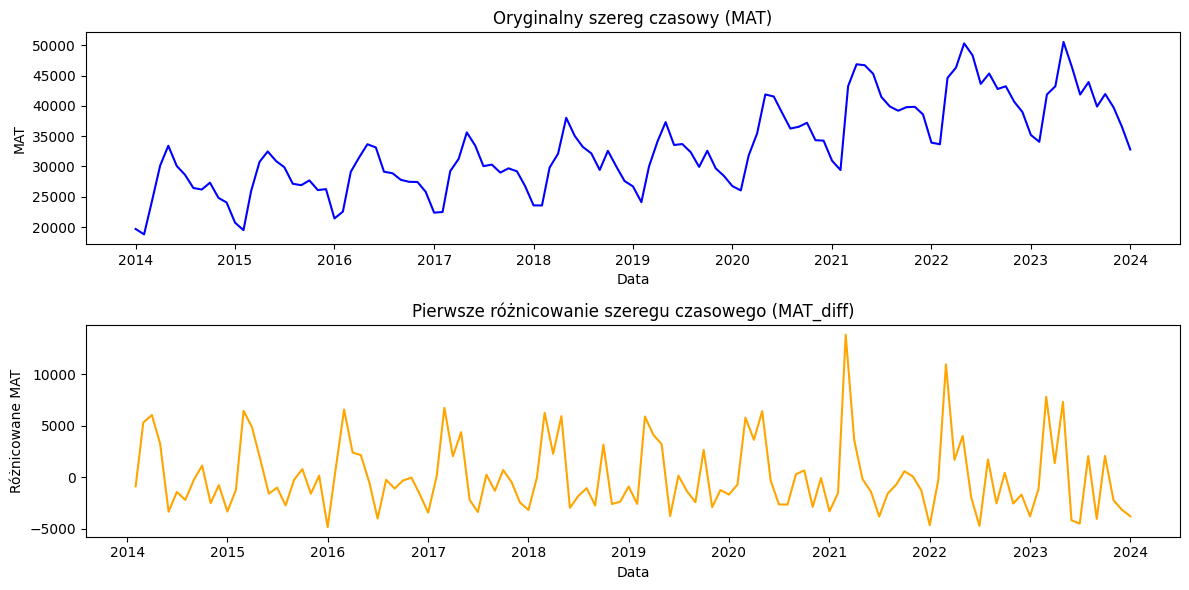

In [553]:
# Pierwsze różnicowanie szeregu
df_materials['MAT_diff'] = df_materials['MAT'].diff()

# Wykres przed i po różnicowaniu
plt.figure(figsize=(12, 6))

# Oryginalny szereg
plt.subplot(2, 1, 1)
plt.plot(df_materials.index, df_materials['MAT'], color='blue')
plt.title('Oryginalny szereg czasowy (MAT)')
plt.xlabel('Data')
plt.ylabel('MAT')

# Zróżnicowany szereg
plt.subplot(2, 1, 2)
plt.plot(df_materials.index, df_materials['MAT_diff'], color='orange')
plt.title('Pierwsze różnicowanie szeregu czasowego (MAT_diff)')
plt.xlabel('Data')
plt.ylabel('Różnicowane MAT')

plt.tight_layout()
plt.show()

In [558]:
# Usunięcie wartości NaN po różnicowaniu
mat_diff = df_materials['MAT_diff'].dropna() 

print("Wyniki testów stacjonarności dla szeregu trzeciego (df_materials)")
adf_test(mat_diff)
pp_test(mat_diff)
kpss_test(mat_diff)

Wyniki testów stacjonarności dla szeregu trzeciego (df_materials)
Test Dickeya-Fullera:
Statystyka testowa: -1.5887182161887683
P-value: 0.48925822568217403
Liczba opóźnień: 13
Liczba obserwacji: 106
Wartości krytyczne: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Brak podstaw do odrzucenia hipotezy zerowej – szereg nie jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -9.929376368583588
P-value: 2.8497786280217525e-17
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.0425679942969077
P-value: 0.1
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [555]:
# Drugie różnicowanie szeregu
df_materials['MAT_diff2'] = df_materials['MAT_diff'].diff()

# Usunięcie NaN po różnicowaniu
mat_diff2 = df_materials['MAT_diff2'].dropna()

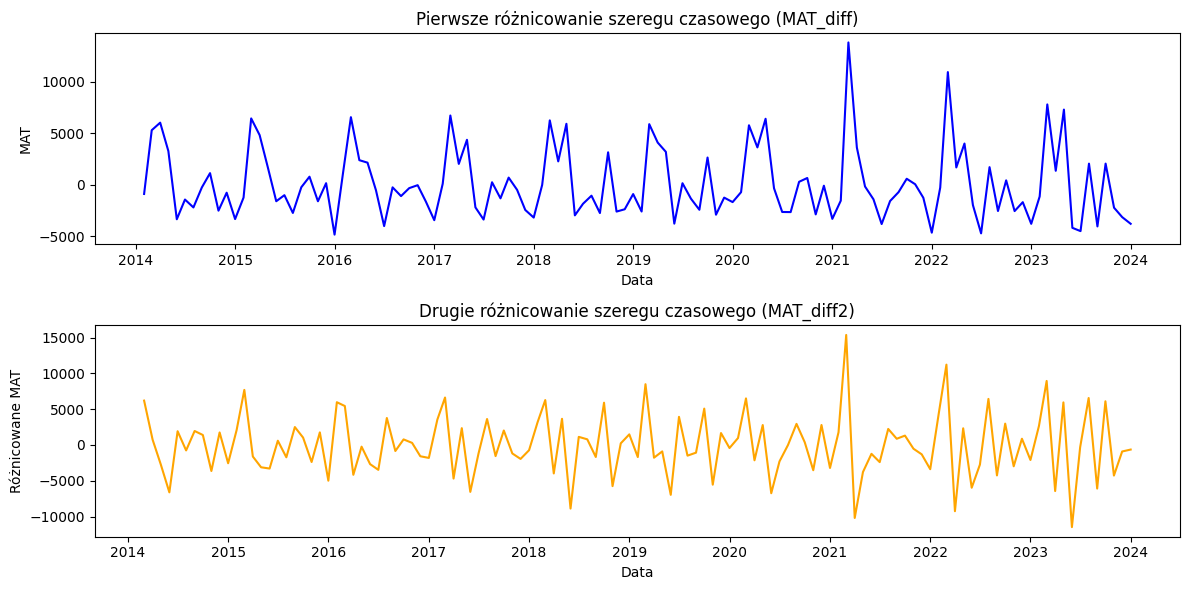

In [556]:
# Wykres przed i po różnicowaniu
plt.figure(figsize=(12, 6))

# Oryginalny szereg
plt.subplot(2, 1, 1)
plt.plot(df_materials.index, df_materials['MAT_diff'], color='blue')
plt.title('Pierwsze różnicowanie szeregu czasowego (MAT_diff)')
plt.xlabel('Data')
plt.ylabel('MAT')

# Zróżnicowany szereg
plt.subplot(2, 1, 2)
plt.plot(df_materials.index, df_materials['MAT_diff2'], color='orange')
plt.title('Drugie różnicowanie szeregu czasowego (MAT_diff2)')
plt.xlabel('Data')
plt.ylabel('Różnicowane MAT')

plt.tight_layout()
plt.show()

In [557]:
# Usunięcie wartości NaN po różnicowaniu
mat_diff2 = df_materials['MAT_diff2'].dropna() 

print("Wyniki testów stacjonarności dla szeregu trzeciego (df_materials)")
adf_test(mat_diff2)
pp_test(mat_diff2)
kpss_test(mat_diff2)

Wyniki testów stacjonarności dla szeregu drugiego (df_cpi)
Test Dickeya-Fullera:
Statystyka testowa: -11.926666421331172
P-value: 4.888862846495087e-22
Liczba opóźnień: 12
Liczba obserwacji: 106
Wartości krytyczne: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test Phillipsa-Perrona:
Statystyka testowa: -30.404921222700487
P-value: 0.0
Odrzucamy hipotezę zerową – szereg jest stacjonarny.

Test KPSS:
Statystyka testowa: 0.0894943196136539
P-value: 0.1
Wartości krytyczne: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Brak podstaw do odrzucenia hipotezy zerowej – szereg jest stacjonarny.


C:\Users\Aldona\AppData\Local\Temp\ipykernel_21284\97477094.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


# ARIMA - dobór modelu

In [72]:
from pmdarima import auto_arima
# rate_fit = auto_arima(df_rate['RATE_diff'].dropna(), trace = True)
# cpi_fit = auto_arima(df_cpi['CPI_diff2'].dropna(), trace = True)
# mat_fit = auto_arima(df_materials['MAT_diff2'].dropna(), trace = True)



In [82]:
rate_fit = auto_arima(df_rate["REAL_INTEREST_RATE"], trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=547.926, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=432.640, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=475.087, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=554.751, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=431.613, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=432.770, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=433.313, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=431.318, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=433.304, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=465.956, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=429.732, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=478.052, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=431.365, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=431.731, 

In [83]:
cpi_fit = auto_arima(df_cpi['CPI'], trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=231.555, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=261.355, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=258.764, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=243.043, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=229.572, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=229.137, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=229.730, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=235.057, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=231.547, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=230.883, Time=0.06 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.351 seconds


In [84]:
mat_fit = auto_arima(df_materials['MAT'].dropna(), trace = True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2014.386, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1985.480, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1974.418, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2052.918, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1974.895, Time=0.07 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1979.571, Time=0.14 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1981.052, Time=0.27 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1981.302, Time=0.08 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1978.095, Time=0.46 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2014.833, Time=0.05 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1978.116, Time=0.36 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1981.824, Time=0.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1984.478, Time=0.09 sec
 ARIMA(1,0,2)(0,1,1)[12]

# ARIMA - model - rate

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [292]:
# df_rate_diff = df_rate[['RATE_diff']]
# df_rate_diff

In [293]:
df_rate.size


242

In [294]:
# df_rate_diff.shape

In [181]:
# train_rate_diff = df_rate_diff[:96].dropna()
# test_rate_diff = df_rate_diff[96:].dropna()

In [305]:
train_rate = df_rate['REAL_INTEREST_RATE'][:96]
test_rate = df_rate['REAL_INTEREST_RATE'][96:]

# train_cpi = df_cpi['CPI'][:96]
# test_cpi = df_cpi['CPI'][96:]

train_mat = df_materials['MAT'][:96]
test_mat = df_materials['MAT'][96:]

In [76]:
model_arima_rate=ARIMA(train_rate, order=(1,0,1))
model_arima_rate = model_arima_rate.fit()
model_arima_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     REAL_INTEREST_RATE   No. Observations:                   96
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -157.620
Date:                Mon, 03 Feb 2025   AIC                            323.239
Time:                        15:18:30   BIC                            333.497
Sample:                    01-01-2014   HQIC                           327.386
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8527      0.476     -1.791      0.073      -1.786       0.080
ar.L1          0.7266      0.089      8.155      0.000       0.552       0.901
ma.L1         -0.0305      0.116     -0.262      0.793      -0.259       0.198
sigma2         1.5504      0.200      7.754      0.000       1.158       1.942
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.63
Prob(Q):                              0.95   Prob(JB):                         0.02
Heteroskedasticity (H):               0.94   Skew:                             0.51
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
rate_pred = model_arima_rate.get_forecast(len(test_rate.index))
rate_pred_df = rate_pred.conf_int(alpha = 0.05) 
rate_pred_df["Predictions"] = model_arima_rate.predict(start = rate_pred_df.index[0], end = rate_pred_df.index[-1])
rate_pred_df.index = test_rate.index
rate_pred_out = rate_pred_df["Predictions"] 
rate_pred_out

DATE
2022-01-01   -3.424361
2022-02-01   -2.721365
2022-03-01   -2.210544
2022-04-01   -1.839363
2022-05-01   -1.569649
2022-06-01   -1.373665
2022-07-01   -1.231257
2022-08-01   -1.127778
2022-09-01   -1.052586
2022-10-01   -0.997949
2022-11-01   -0.958248
2022-12-01   -0.929399
2023-01-01   -0.908437
2023-02-01   -0.893205
2023-03-01   -0.882137
2023-04-01   -0.874095
2023-05-01   -0.868251
2023-06-01   -0.864005
2023-07-01   -0.860919
2023-08-01   -0.858677
2023-09-01   -0.857048
2023-10-01   -0.855864
2023-11-01   -0.855004
2023-12-01   -0.854379
2024-01-01   -0.853924
Freq: MS, Name: Predictions, dtype: float64

<Axes: xlabel='DATE'>

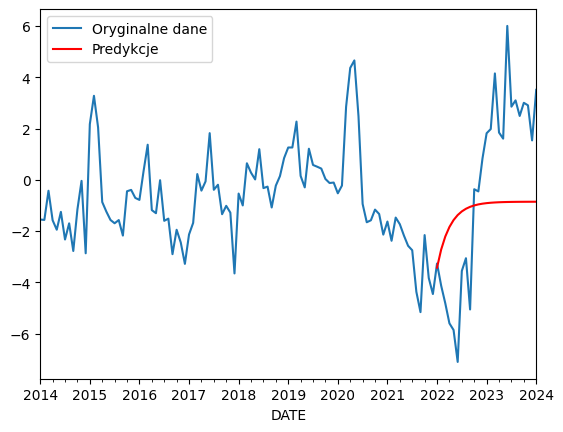

In [78]:
data_rate_arima = train_rate + test_rate
data_rate['REAL_INTEREST_RATE'].plot(legend=True, label = 'Oryginalne dane')
rate_pred_out.plot(legend=True, color = 'red', label = 'Predykcje')



# ARIMA - model - cpi

In [650]:
df_cpi_diff = df_cpi[['CPI_diff2']]
df_cpi_diff

,CPI_diff2
DATE,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,0.222
2014-04-01,-0.041
2014-05-01,0.010
...,...
2023-09-01,-0.458
2023-10-01,-0.858
2023-11-01,0.250


In [651]:
train_cpi_diff = df_cpi_diff[:96].dropna()
test_cpi_diff = df_cpi_diff[96:].dropna()

In [740]:
model_arima_cpi=ARIMA(train_cpi, order=(0,2,2))
# model_arima_cpi=ARIMA(train_cpi, order=(2,0,2))
model_arima_cpi = model_arima_cpi.fit()
model_arima_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                   96
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -73.307
Date:                Thu, 19 Dec 2024   AIC                            152.614
Time:                        18:39:32   BIC                            160.244
Sample:                    01-01-2014   HQIC                           155.696
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3181      0.076     -4.181      0.000      -0.467      -0.169
ma.L2         -0.4176      0.090     -4.654      0.000      -0.594      -0.242
sigma2         0.2764      0.033      8.303      0.000       0.211       0.342
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 4.29
Prob(Q):                              0.73   Prob(JB):                         0.12
Heteroskedasticity (H):               1.65   Skew:                            -0.13
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [741]:
cpi_pred = model_arima_cpi.get_forecast(len(test_cpi.index))
cpi_pred_df = cpi_pred.conf_int(alpha = 0.05) 
cpi_pred_df["Predictions"] = model_arima_cpi.predict(start = cpi_pred_df.index[0], end = cpi_pred_df.index[-1])
cpi_pred_df.index = test_cpi.index
cpi_pred_out = cpi_pred_df["Predictions"] 
cpi_pred_out

DATE
2022-01-01    282.616741
2022-02-01    284.304757
2022-03-01    285.992774
2022-04-01    287.680790
2022-05-01    289.368806
2022-06-01    291.056822
2022-07-01    292.744838
2022-08-01    294.432855
2022-09-01    296.120871
2022-10-01    297.808887
2022-11-01    299.496903
2022-12-01    301.184920
2023-01-01    302.872936
2023-02-01    304.560952
2023-03-01    306.248968
2023-04-01    307.936984
2023-05-01    309.625001
2023-06-01    311.313017
2023-07-01    313.001033
2023-08-01    314.689049
2023-09-01    316.377066
2023-10-01    318.065082
2023-11-01    319.753098
2023-12-01    321.441114
2024-01-01    323.129130
Freq: MS, Name: Predictions, dtype: float64

<Axes: xlabel='DATE'>

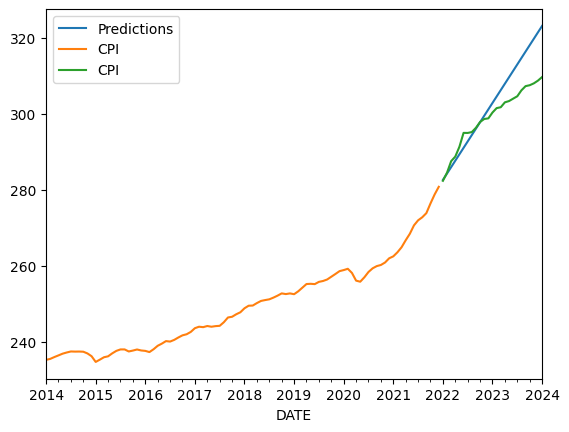

In [742]:
cpi_pred_out.plot(legend=True)
train_cpi.plot(legend=True)
test_cpi.plot(legend=True)

# ARIMA - model - mat

In [85]:
df_mat_diff = df_materials[['MAT_diff2']]
df_mat_diff

KeyError: "None of [Index(['MAT_diff2'], dtype='object')] are in the [columns]"

In [49]:
train_mat_diff = df_mat_diff[:96].dropna()
test_mat_diff = df_mat_diff[96:].dropna()

NameError: name 'df_mat_diff' is not defined

In [79]:
model_arima_mat=ARIMA(train_mat, order=(0,0,3), seasonal_order=(1,1,1,12))
model_arima_mat = model_arima_mat.fit()
model_arima_mat.summary()

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                MAT   No. Observations:                   96
Model:             ARIMA(0, 0, 3)x(1, 1, [1], 12)   Log Likelihood                -760.585
Date:                            Mon, 03 Feb 2025   AIC                           1533.169
Time:                                    15:26:03   BIC                           1547.754
Sample:                                01-01-2014   HQIC                          1539.032
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4641      0.099      4.692      0.000       0.270       0.658
ma.L2          0.0164      0.098      0.166      0.868      -0.176       0.209
ma.L3          0.1117      0.076      1.462      0.144      -0.038       0.262
ar.S.L12       0.9999      0.006    179.765      0.000       0.989       1.011
ma.S.L12      -0.9967      0.134     -7.434      0.000      -1.259      -0.734
sigma2      4.934e+06   2.45e-08   2.02e+14      0.000    4.93e+06    4.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.74   Jarque-Bera (JB):               124.04
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             0.68
Prob(H) (two-sided):                  0.13   Kurtosis:                         8.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.63e+29. Standard errors may be unstable.
"""

In [80]:
mat_pred = model_arima_mat.get_forecast(len(test_mat.index))
mat_pred_df = mat_pred.conf_int(alpha = 0.05) 
mat_pred_df["Predictions"] = model_arima_mat.predict(start = mat_pred_df.index[0], end = mat_pred_df.index[-1])
mat_pred_df.index = test_mat.index
mat_pred_out = mat_pred_df["Predictions"] 
mat_pred_out

DATE
2022-01-01    32929.423035
2022-02-01    31162.920149
2022-03-01    45349.394351
2022-04-01    49031.039832
2022-05-01    48825.629112
2022-06-01    47387.233748
2022-07-01    43393.261438
2022-08-01    41751.316039
2022-09-01    41019.162940
2022-10-01    41644.140073
2022-11-01    41764.779202
2022-12-01    40594.547701
2023-01-01    34359.097107
2023-02-01    32564.796188
2023-03-01    47366.548349
2023-04-01    51207.928721
2023-05-01    50960.110222
2023-06-01    49490.321671
2023-07-01    45310.389946
2023-08-01    43600.503858
2023-09-01    42849.198988
2023-10-01    43511.150690
2023-11-01    43695.424535
2023-12-01    42612.955449
2024-01-01    35788.672055
Freq: MS, Name: Predictions, dtype: float64

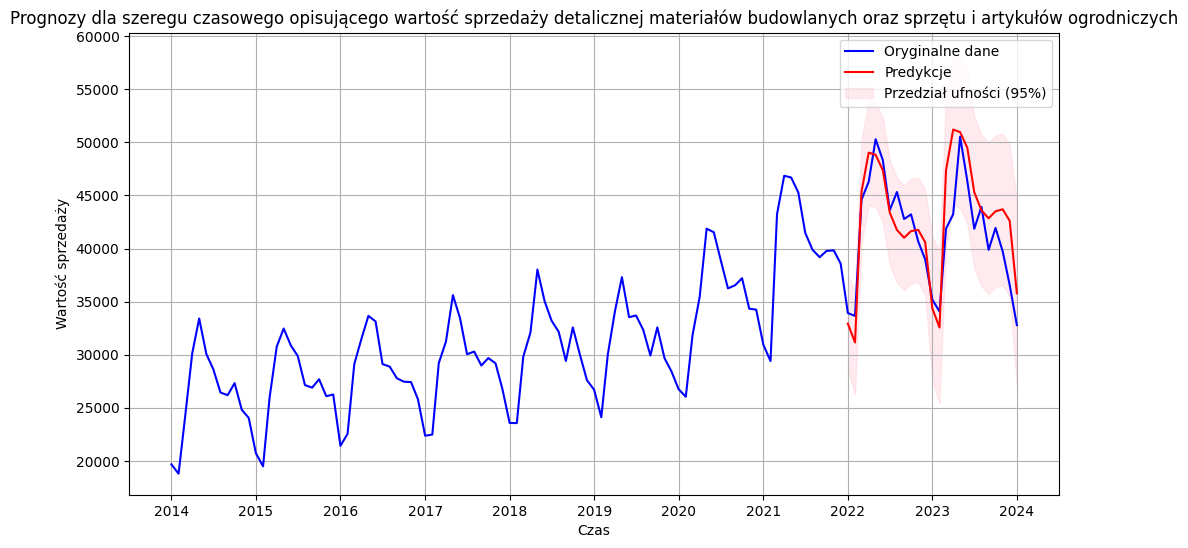

In [81]:
import matplotlib.pyplot as plt

# Zakładam, że model ARIMA został wytrenowany i dane są gotowe
# Generowanie prognoz i przedziałów ufności
forecast = model_arima_mat.get_forecast(steps=len(mat_pred_out))  # Prognoza
conf_int = forecast.conf_int(alpha=0.05)  # Przedział ufności (95%)

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Wykres oryginalnych danych
plt.plot(df_materials.index, df_materials.values, label='Oryginalne dane', color='blue')

# Wykres predykcji
plt.plot(mat_pred_out.index, mat_pred_out.values, label='Predykcje', color='red')

# Dodanie przedziału ufności
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0],  # Dolna granica przedziału
                 conf_int.iloc[:, 1],  # Górna granica przedziału
                 color='pink', alpha=0.3, label='Przedział ufności (95%)')

# Dostosowanie wykresu
plt.title('Prognozy dla szeregu czasowego opisującego wartość sprzedaży detalicznej materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Czas')
plt.ylabel('Wartość sprzedaży')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()


In [187]:
import matplotlib.pyplot as plt

# Zakładam, że model ARIMA został wytrenowany i dane są gotowe
# Generowanie prognoz i przedziałów ufności
forecast = model_arima_mat.get_forecast(steps=len(mat_pred_out))  # Prognoza
conf_int = forecast.conf_int(alpha=0.05)  # Przedział ufności (95%)

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Wykres oryginalnych danych
plt.plot(df_materials.index, df_materials.values, label='Oryginalne dane')

# Wykres predykcji
plt.plot(mat_pred_out.index, mat_pred_out.values, label='Predykcje', color='red')

# Wykres predykcji treningowych
plt.plot(data_mat.index[sequence_length:sequence_length+len(train_predict_mat)], train_predict_mat, label="Treningowe predykcje", color='orange')

# Wykres predykcji testowych
plt.plot(data_mat.index[train_size:], test_predict_mat, label="Testowe predykcje", color='#ff44fd')

# Dodanie przedziału ufności
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0],  # Dolna granica przedziału
                 conf_int.iloc[:, 1],  # Górna granica przedziału
                 color='pink', alpha=0.3, label='Przedział ufności (95%)')

# Dostosowanie wykresu
plt.title('Prognozy dla szeregu czasowego opisującego wartość sprzedaży detalicznej materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Czas')
plt.ylabel('Wartość sprzedaży')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()


NameError: name 'model_arima_mat' is not defined

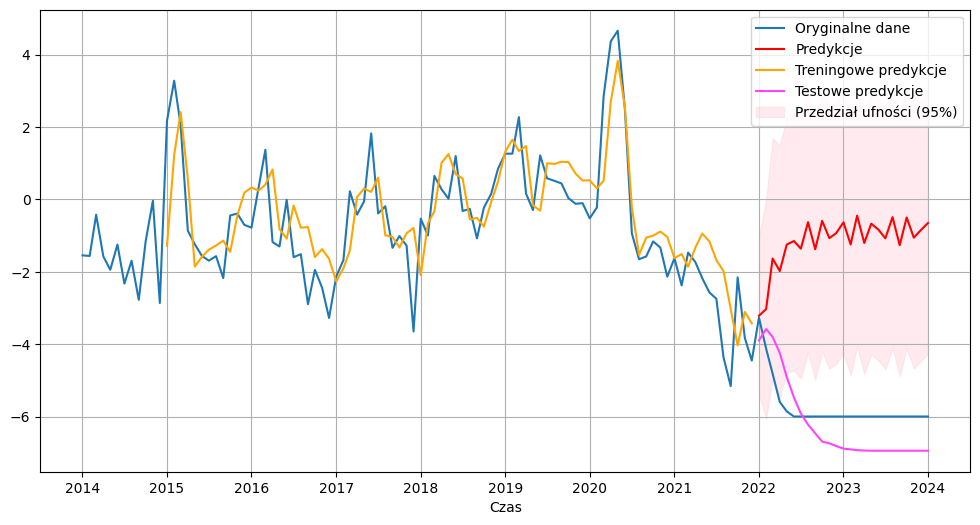

In [309]:
import matplotlib.pyplot as plt

# Zakładam, że model ARIMA został wytrenowany i dane są gotowe
# Generowanie prognoz i przedziałów ufności
forecast = model_arima_rate.get_forecast(steps=len(rate_pred_out))  # Prognoza
conf_int = forecast.conf_int(alpha=0.05)  # Przedział ufności (95%)

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Wykres oryginalnych danych
plt.plot(df_rate['REAL_INTEREST_RATE'].index, df_rate['REAL_INTEREST_RATE'].values, label='Oryginalne dane',)

# Wykres predykcji
plt.plot(rate_pred_out.index, rate_pred_out.values, label='Predykcje', color='red')

# Wykres predykcji treningowych
plt.plot(data_rate.index[sequence_length:sequence_length+len(train_predict_rate)], train_predict_rate, label="Treningowe predykcje", color='orange')

# Wykres predykcji testowych
plt.plot(data_rate.index[train_size:], test_predict_rate, label="Testowe predykcje", color='#ff44fd')

# Dodanie przedziału ufności
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0],  # Dolna granica przedziału
                 conf_int.iloc[:, 1],  # Górna granica przedziału
                 color='pink', alpha=0.3, label='Przedział ufności (95%)')

# Dostosowanie wykresu
#plt.title('Prognozy dla szeregu czasowego opisującego wartość sprzedaży detalicznej materiałów budowlanych oraz sprzętu i artykułów ogrodniczych')
plt.xlabel('Czas')
#plt.ylabel('Wartość sprzedaży')
plt.legend()
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

In [198]:
df_rate['REAL_INTEREST_RATE']

DATE
2014-01-01   -1.547831
2014-02-01   -1.563561
2014-03-01   -0.425359
2014-04-01   -1.576272
2014-05-01   -1.945522
                ...   
2023-09-01    2.492336
2023-10-01    3.005341
2023-11-01    2.907568
2023-12-01    1.538694
2024-01-01    3.511612
Freq: MS, Name: REAL_INTEREST_RATE, Length: 121, dtype: float64

In [202]:
# Zmiana wartości od czerwca 2022
df_rate2 = df_rate
df_rate2.loc['2022-06-01':, 'REAL_INTEREST_RATE'] = -6

In [203]:
df_rate2

,REAL_INTEREST_RATE,DIFF_REAL_INTEREST_RATE
DATE,,
2014-01-01,-1.547831,NaN
2014-02-01,-1.563561,-0.015730
2014-03-01,-0.425359,1.138202
2014-04-01,-1.576272,-1.150912
2014-05-01,-1.945522,-0.369251
...,...,...
2023-09-01,-6.000000,-0.607977
2023-10-01,-6.000000,0.513005
2023-11-01,-6.000000,-0.097773


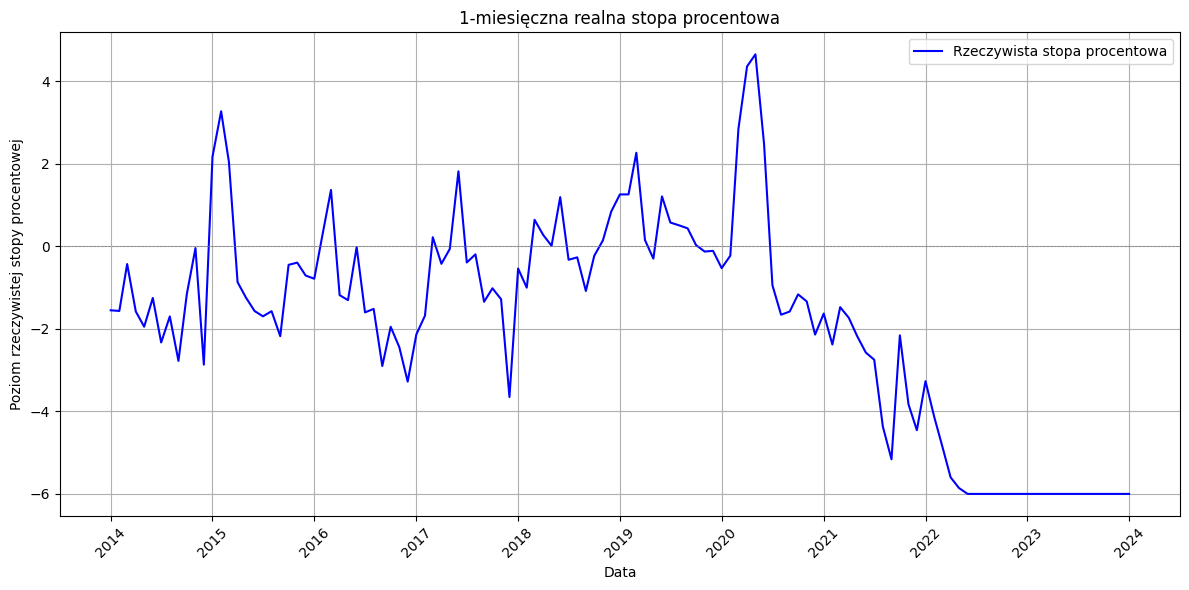

In [204]:
#df_rate['DATE'] = pd.to_datetime(df_rate['DATE'])

plt.figure(figsize=(12, 6))  # Ustawienie rozmiaru wykresu
plt.plot(df_rate2.index, df_rate2['REAL_INTEREST_RATE'], label='Rzeczywista stopa procentowa', color='blue')
plt.title('1-miesięczna realna stopa procentowa')
plt.xlabel('Data')
plt.ylabel('Poziom rzeczywistej stopy procentowej')

# Ustawienie wyświetlania daty
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tick co rok
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tylko roku

# Pochylenie napisów na osi X
plt.xticks(rotation=45)  # Pochylenie napisów o 45 stopni

plt.axhline(0, color='grey', lw=0.5, ls='--')  # Linia odniesienia na poziomie 0
plt.grid()
plt.legend()
plt.tight_layout()  # Dopasowanie układu do wykresu
plt.show()


In [205]:
# Normalizacja danych REAL_INTEREST_RATE
scaler_rate2 = MinMaxScaler(feature_range=(0, 1))
scaled_data_rate2 = scaler_rate2.fit_transform(df_rate)

# Funkcja tworząca sekwencje dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

# Parametry
sequence_length = 12  # Długość sekwencji wejściowych

# Podział danych na zbiór treningowy i testowy
train_size_rate2 = 96  # Pierwsze 96 miesięcy to zbiór treningowy
train_data_rate2 = scaled_data_rate2[:train_size_rate2]
test_data_rate2 = scaled_data_rate2[train_size_rate2 - sequence_length:]

# Generowanie sekwencji
X_train_rate2, y_train_rate2 = create_sequences(train_data_rate, sequence_length)
X_test_rate2, y_test_rate2 = create_sequences(test_data_rate, sequence_length)

# Zmiana kształtu danych dla LSTM: (samples, timesteps, features)
X_train_rate2 = X_train_rate2.reshape((X_train_rate2.shape[0], X_train_rate2.shape[1], 1))
X_test_rate2 = X_test_rate2.reshape((X_test_rate2.shape[0], X_test_rate2.shape[1], 1))


In [206]:
# Budowa modelu LSTM
model_rate2 = Sequential()
model_rate2.add(LSTM(100, activation='tanh', return_sequences=False, input_shape=(sequence_length, 1)))
model_rate2.add(Dense(1))  # Warstwa wyjściowa
model_rate2.compile(optimizer='adam', loss='mse')
model_rate2.summary()

c:\Users\Aldona\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trenowanie modelu
history_rate2 = model_rate2.fit(X_train_rate2, y_train_rat2e, 
                              epochs=250, 
                              batch_size=12, 
                              validation_data=(X_test_rate2, y_test_rate2), 
                              verbose=1)

In [ ]:
# Prognoza
train_predict_rate = model_rate.predict(X_train_rate)
test_predict_rate = model_rate.predict(X_test_rate)

# Odskalowanie danych
train_predict_rate = scaler_rate.inverse_transform(np.concatenate((train_predict_rate, np.zeros((train_predict_rate.shape[0], 1))), axis=1))[:, 0]
test_predict_rate = scaler_rate.inverse_transform(np.concatenate((test_predict_rate, np.zeros((test_predict_rate.shape[0], 1))), axis=1))[:, 0]

y_train_rescaled_rate = scaler_rate.inverse_transform(np.concatenate((y_train_rate.reshape(-1, 1), np.zeros((y_train_rate.shape[0], 1))), axis=1))[:, 0]
y_test_rescaled_rate = scaler_rate.inverse_transform(np.concatenate((y_test_rate.reshape(-1, 1), np.zeros((y_test_rate.shape[0], 1))), axis=1))[:, 0]

# Wyświetlenie wyników
plt.figure(figsize=(12, 6))
plt.plot(data_rate.index, data_rate['REAL_INTEREST_RATE'], label="Oryginalne dane",)
plt.plot(data_rate.index[sequence_length:sequence_length+len(train_predict_rate)], train_predict_rate, label="Treningowe predykcje")
plt.plot(data_rate.index[96:], test_predict_rate, label="Testowe predykcje", color = 'red')

# Dodanie tytułu i etykiet
plt.title("Prognozy dla szeregu czasowego jednomiesięcznej rzeczywistej stopy procentowej")
plt.xlabel("Czas")
plt.ylabel("Wartość stopy procentowej")
plt.legend()
plt.grid()
plt.show()

In [ ]:
model_arima_rate=ARIMA(train_rate, order=(1,0,1))
model_arima_rate = model_arima_rate.fit()
model_arima_rate.summary()

In [ ]:
rate_pred = model_arima_rate.get_forecast(len(test_rate.index))
rate_pred_df = rate_pred.conf_int(alpha = 0.05) 
rate_pred_df["Predictions"] = model_arima_rate.predict(start = rate_pred_df.index[0], end = rate_pred_df.index[-1])
rate_pred_df.index = test_rate.index
rate_pred_out = rate_pred_df["Predictions"] 
rate_pred_out

In [ ]:
data_rate_arima = train_rate + test_rate
data_rate['REAL_INTEREST_RATE'].plot(legend=True, label = 'Oryginalne dane')
rate_pred_out.plot(legend=True, color = 'red', label = 'Predykcje')